**Context**

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it. 

**Data**

- S.No. : Serial Number
- Name : Name of the car which includes Brand name and Model name
- Location : The location in which the car is being sold or is available for purchase Cities
- Year : Manufacturing year of the car
- Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
- Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
- Transmission : The type of transmission used by the car. (Automatic / Manual)
- Owner : Type of ownership
- Mileage : The standard mileage offered by the car company in kmpl or km/kg
- Engine : The displacement volume of the engine in CC.
- Power : The maximum power of the engine in bhp.
- Seats : The number of seats in the car.
- New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
- Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)

**Objective**

- Explore and visualize the dataset.
- Build a linear regression model to predict the prices of used cars.
- Generate a set of insights and recommendations that will help the business.

## Data structure and initial observations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from mlxtend.feature_selection import SequentialFeatureSelector

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.options.display.float_format = '{:,.4f}'.format
%matplotlib inline

In [2]:
data = pd.read_csv('used_cars_data.csv')   # save a copy of dataset to data

In [3]:
df = data.copy()   # copy to df

In [4]:
df.head()   # display the first 5 rows

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0000,NaN,1.7500
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0000,NaN,12.5000
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0000,8.61 Lakh,4.5000
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0000,NaN,6.0000
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0000,NaN,17.7400


In [5]:
df.sample(5)   # randomly display 5 rows

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4942,4942,Audi A4 35 TDI Premium Plus,Coimbatore,2014,28469,Diesel,Automatic,First,18.25 kmpl,1968 CC,187.74 bhp,5.0000,53.14 Lakh,24.3700
4237,4237,Renault KWID RXT Optional,Mumbai,2016,16000,Petrol,Manual,First,25.17 kmpl,799 CC,53.3 bhp,5.0000,4.78 Lakh,2.9900
4857,4857,Hyundai EON Era Plus,Jaipur,2015,54680,Petrol,Manual,First,21.1 kmpl,814 CC,55.2 bhp,5.0000,NaN,2.5000
5724,5724,Chevrolet Cruze LTZ,Coimbatore,2014,64042,Diesel,Manual,First,17.3 kmpl,1998 CC,163.7 bhp,5.0000,NaN,5.7000
51,51,Maruti Swift LDI,Delhi,2014,52000,Diesel,Manual,First,22.9 kmpl,1248 CC,74 bhp,5.0000,NaN,4.2500


In [6]:
df.tail()  # display the last 5 rwos

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0000,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0000,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0000,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0000,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0000,NaN,NaN


In [7]:
df.shape 

(7253, 14)

In [8]:
df.info()    # data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


**Observation:** 
- 7253 rows and 14 columns. Serial Number, Year, Kilometers_Driven, Seats and Price are numerical variables. Others are objects.
- Name consists of brand name and model name, which could be splitted into two.
- Mileage, Engine and Power should be numbers instead of objects.
- Mixed measurements for Mileage.
- Lots of missing values in New_Price and Price.
- Serial Number is the same as index. Since it doesn't help with prediction, just drop it.

In [9]:
missing_value_df = pd.DataFrame(df.isnull().sum().sort_values(ascending = False), 
                                columns = ['No. of missing values'])   # check the number of missing values

missing_value_df['Percentage'] = 100 * missing_value_df['No. of missing values'] / df.shape[0]  # check the percentage of missing values to total observations
missing_value_df

,No. of missing values,Percentage
New_Price,6247,86.1299
Price,1234,17.0136
Seats,53,0.7307
Engine,46,0.6342
Power,46,0.6342
Mileage,2,0.0276
S.No.,0,0.0000
Name,0,0.0000
Location,0,0.0000
Year,0,0.0000


**Observation:**
- Column New Price, Price, Seats, Engine, Power and Mileage have missing values.
- The number of missing values in New_Price takes more than 85% of the total observations, which is too high to fix by imputation. Better just drop the column.

In [10]:
df.isnull().sum(axis = 1).value_counts(ascending = False)   # check missing values for rows

1    5335
2    1048
0     823
4      36
5      10
3       1
dtype: int64

**Observation:**  Most rows miss 1 element, which is probably the New_Price.

## Data preprocessing - part 1

 #### Drop column S.No. and New_Price

In [11]:
df.drop(['S.No.', 'New_Price'], axis = 1, inplace = True)  # drop S.No. and New_Price
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0000,1.7500
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0000,12.5000
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0000,4.5000
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0000,6.0000
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0000,17.7400


In [12]:
phase1 = df.copy()   # for debug use !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [13]:
df = phase1.copy()    # drop two columns. for debug use !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

#### Remove the unit of Power, convert null to NaN and cast the column to numbers

In [14]:
[x for x in df.Power.unique() if str(x).startswith('null')]   #  some elements in Power column have the value of 'null bhp'

['null bhp']

In [15]:
df.Power.replace('null bhp', np.nan, inplace = True)   # replace them with NaN 

In [16]:
print("Now the number of missing values in Power column: ", df.Power.isnull().sum())

Now the number of missing values in Power column:  175


In [17]:
# remove the unit of Power, cast to float64
isNumber = df.Power.notnull()
df.Power[isNumber] = df.Power[isNumber].str.strip().str.replace(' bhp', '').astype('float64')
df.Power = df.Power.fillna(np.nan)

#### Remove the unit of Engine and cast the column to numbers

In [18]:
# remove the unit of Engine, cast to float64
isNumber = df.Engine.notnull()
df.Engine[isNumber] = df.Engine[isNumber].str.strip().str.replace(' CC', '').astype('float64')
df.Engine = df.Engine.fillna(np.nan)

#### Remove the unit of Mileage and cast the column to numbers

In [19]:
# take a look at the Mileage column to see why it has multiple units
print('Mileage ending with kmpl: ', df.Mileage.str.endswith('kmpl').sum(), 
      ", fuel type: ", df.loc[df.Mileage.notnull() & df.Mileage.str.endswith('pl'), 'Fuel_Type'].unique())

print('Mileage ending with km/kg: ', df.Mileage.str.endswith('km/kg').sum(), 
      ", fuel type: ", df.loc[df.Mileage.notnull() & df.Mileage.str.endswith('kg'), 'Fuel_Type'].unique())

Mileage ending with kmpl:  7177 , fuel type:  ['Diesel' 'Petrol']
Mileage ending with km/kg:  74 , fuel type:  ['CNG' 'LPG']


In [20]:
df.loc[df.Fuel_Type == 'Electric', ['Fuel_Type', 'Mileage']]   # check the unit for Electric car

,Fuel_Type,Mileage
4446,Electric,NaN
4904,Electric,NaN


**Observation:** Diesel cars and Petrol cars use kmpl as unit. CNG cars and LPG cars use km/kg as unit. Missing values in Mileage column all come from electric cars.

In [21]:
def convert_Mileage(val):
    """
    input:
    val: mileage. NaN or string which consists of number + km/kg or number + kmpl.
    
    output:
    transformed mileage. float.
    """
    if val != val:
        return np.nan
    
    l = val.split(' ')
    return float(l[0])

In [22]:
# remove the unit of Mileage, cast to float64
df.Mileage = df.Mileage.apply(convert_Mileage)

#### Data summary

In [23]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,"7,253.0000",NaN,NaN,NaN,"2,013.3654",3.2544,"1,996.0000","2,011.0000","2,014.0000","2,016.0000","2,019.0000"
Kilometers_Driven,"7,253.0000",NaN,NaN,NaN,"58,699.0631","84,427.7206",171.0000,"34,000.0000","53,416.0000","73,000.0000","6,500,000.0000"
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,"7,251.0000",NaN,NaN,NaN,18.1416,4.5622,0.0000,15.1700,18.1600,21.1000,33.5400
Engine,"7,207.0000",NaN,NaN,NaN,"1,616.5735",595.2851,72.0000,"1,198.0000","1,493.0000","1,968.0000","5,998.0000"
Power,"7,078.0000",NaN,NaN,NaN,112.7652,53.4936,34.2000,75.0000,94.0000,138.1000,616.0000


**Observation:** 
- The minimum of Mileage and Seats is 0, which doesn't make sense. Guess these inputs are omitted. Treated them as NaN and do imputation later.
- The numbe of unique values in Name is more than 2000, too many to handle. A better solution is to drop the model name, keeping the brand name only.
- Name, location, Year, Fuel_Type, Transmission, Owner_Type and Seats should be categorical variables.

#### Convert 0 in Mileage and Seats to NaN

In [24]:
df.loc[df.Mileage == 0, 'Mileage'] = np.nan
df.loc[df.Seats == 0, 'Seats'] = np.nan

In [25]:
phase2 = df.copy()   # for debug use !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [26]:
df = phase2.copy() # remove units. convert null and 0 to np.nan. for debug use !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

#### Extract brand name from Name column

In [27]:
brands = df.Name.apply(lambda x: x.title().split(' ', maxsplit = 1)[0])   # first convert the names to title, then extract the first word as the brand name
pd.DataFrame(np.sort(brands.unique()), columns = ['Brand'])     # sort the unique values to make it easier to scrutinize

,Brand
0,Ambassador
1,Audi
2,Bentley
3,Bmw
4,Chevrolet
5,Datsun
6,Fiat
7,Force
8,Ford
9,Hindustan


**Observation:** 
- If brand name has more than 1 word, this solution doesn't get it right.
- Ambassador is a mobel name, which is manufactured by Hindustan Motors.
- Opelcorsa is a model name, which is manufactured by Opel.

In [28]:
update_brands = {'Force' :'Force One',
                 'Land': 'Land Rover',
                 'Ambassador': 'Hindustan',
                 'Opelcorsa': 'Opel'}

for before, after in update_brands.items():
    brands = brands.replace(before, after)           # correct wrong brand names

In [29]:
pd.DataFrame(np.sort(brands.unique()), columns = ['Brand'])   # check it again

,Brand
0,Audi
1,Bentley
2,Bmw
3,Chevrolet
4,Datsun
5,Fiat
6,Force One
7,Ford
8,Hindustan
9,Honda


In [30]:
df['Brand'] = brands   # add a column named Brand
df.drop('Name', axis = 1, inplace = True)    # drop the original Name column
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Mumbai,2010,72000,CNG,Manual,First,26.6000,998.0000,58.1600,5.0000,1.7500,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.6700,"1,582.0000",126.2000,5.0000,12.5000,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.2000,"1,199.0000",88.7000,5.0000,4.5000,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.7700,"1,248.0000",88.7600,7.0000,6.0000,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2000,"1,968.0000",140.8000,5.0000,17.7400,Audi


#### Cast Location, Year, Fuel_Type, Transmission, Owner_Type, Seats and Brand to categorical variable

In [31]:
categorical_columns = ['Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats', 'Brand']
for col in categorical_columns:
    df[col] = df[col].astype('category') 

In [32]:
df.info()     # check dtypes again

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7253 non-null   category
 1   Year               7253 non-null   category
 2   Kilometers_Driven  7253 non-null   int64   
 3   Fuel_Type          7253 non-null   category
 4   Transmission       7253 non-null   category
 5   Owner_Type         7253 non-null   category
 6   Mileage            7170 non-null   float64 
 7   Engine             7207 non-null   float64 
 8   Power              7078 non-null   float64 
 9   Seats              7199 non-null   category
 10  Price              6019 non-null   float64 
 11  Brand              7253 non-null   category
dtypes: category(7), float64(4), int64(1)
memory usage: 336.3 KB


**Observation:** Now we have 7 categorical columns and 5 numerical columns. The size of data set decreases significantly.

In [33]:
phase3 = df.copy()   # for debug use !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [34]:
df = phase3.copy() # convert to categorical variables. extract brand name from name column. for debug use !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

## EDA

In [35]:
df.describe(include = 'category').T   # summary for categorical variables

,count,unique,top,freq
Location,7253,11,Mumbai,949
Year,7253,23,2015,929
Fuel_Type,7253,5,Diesel,3852
Transmission,7253,2,Manual,5204
Owner_Type,7253,4,First,5952
Seats,"7,199.0000",8.0000,5.0000,"6,047.0000"
Brand,7253,31,Maruti,1444


**Observation:** 
- The most frequent location is Mumbai. The most frequent manufacturing year is 2015.
- About 50% of the cars use Diesel.
- Most cars are manual transmission, with only one previous owner and five seats.
- The total number of brands is 31. Maruti is the brand that occurs most frequently.

In [36]:
df.describe().T   # summary for numerical variables

,count,mean,std,min,25%,50%,75%,max
Kilometers_Driven,"7,253.0000","58,699.0631","84,427.7206",171.0000,"34,000.0000","53,416.0000","73,000.0000","6,500,000.0000"
Mileage,"7,170.0000",18.3465,4.1579,6.4000,15.3000,18.2000,21.1000,33.5400
Engine,"7,207.0000","1,616.5735",595.2851,72.0000,"1,198.0000","1,493.0000","1,968.0000","5,998.0000"
Power,"7,078.0000",112.7652,53.4936,34.2000,75.0000,94.0000,138.1000,616.0000
Price,"6,019.0000",9.4795,11.1879,0.4400,3.5000,5.6400,9.9500,160.0000


**Observation:**
- The mean and median of Mileage are similar.
- All the other vairables have right skewed distribution.
- All variables but Mileage show great variance. The magnitude also differs drastically among variables. 

### Univariate analysis

#### Histogram and boxplot of numerical variables

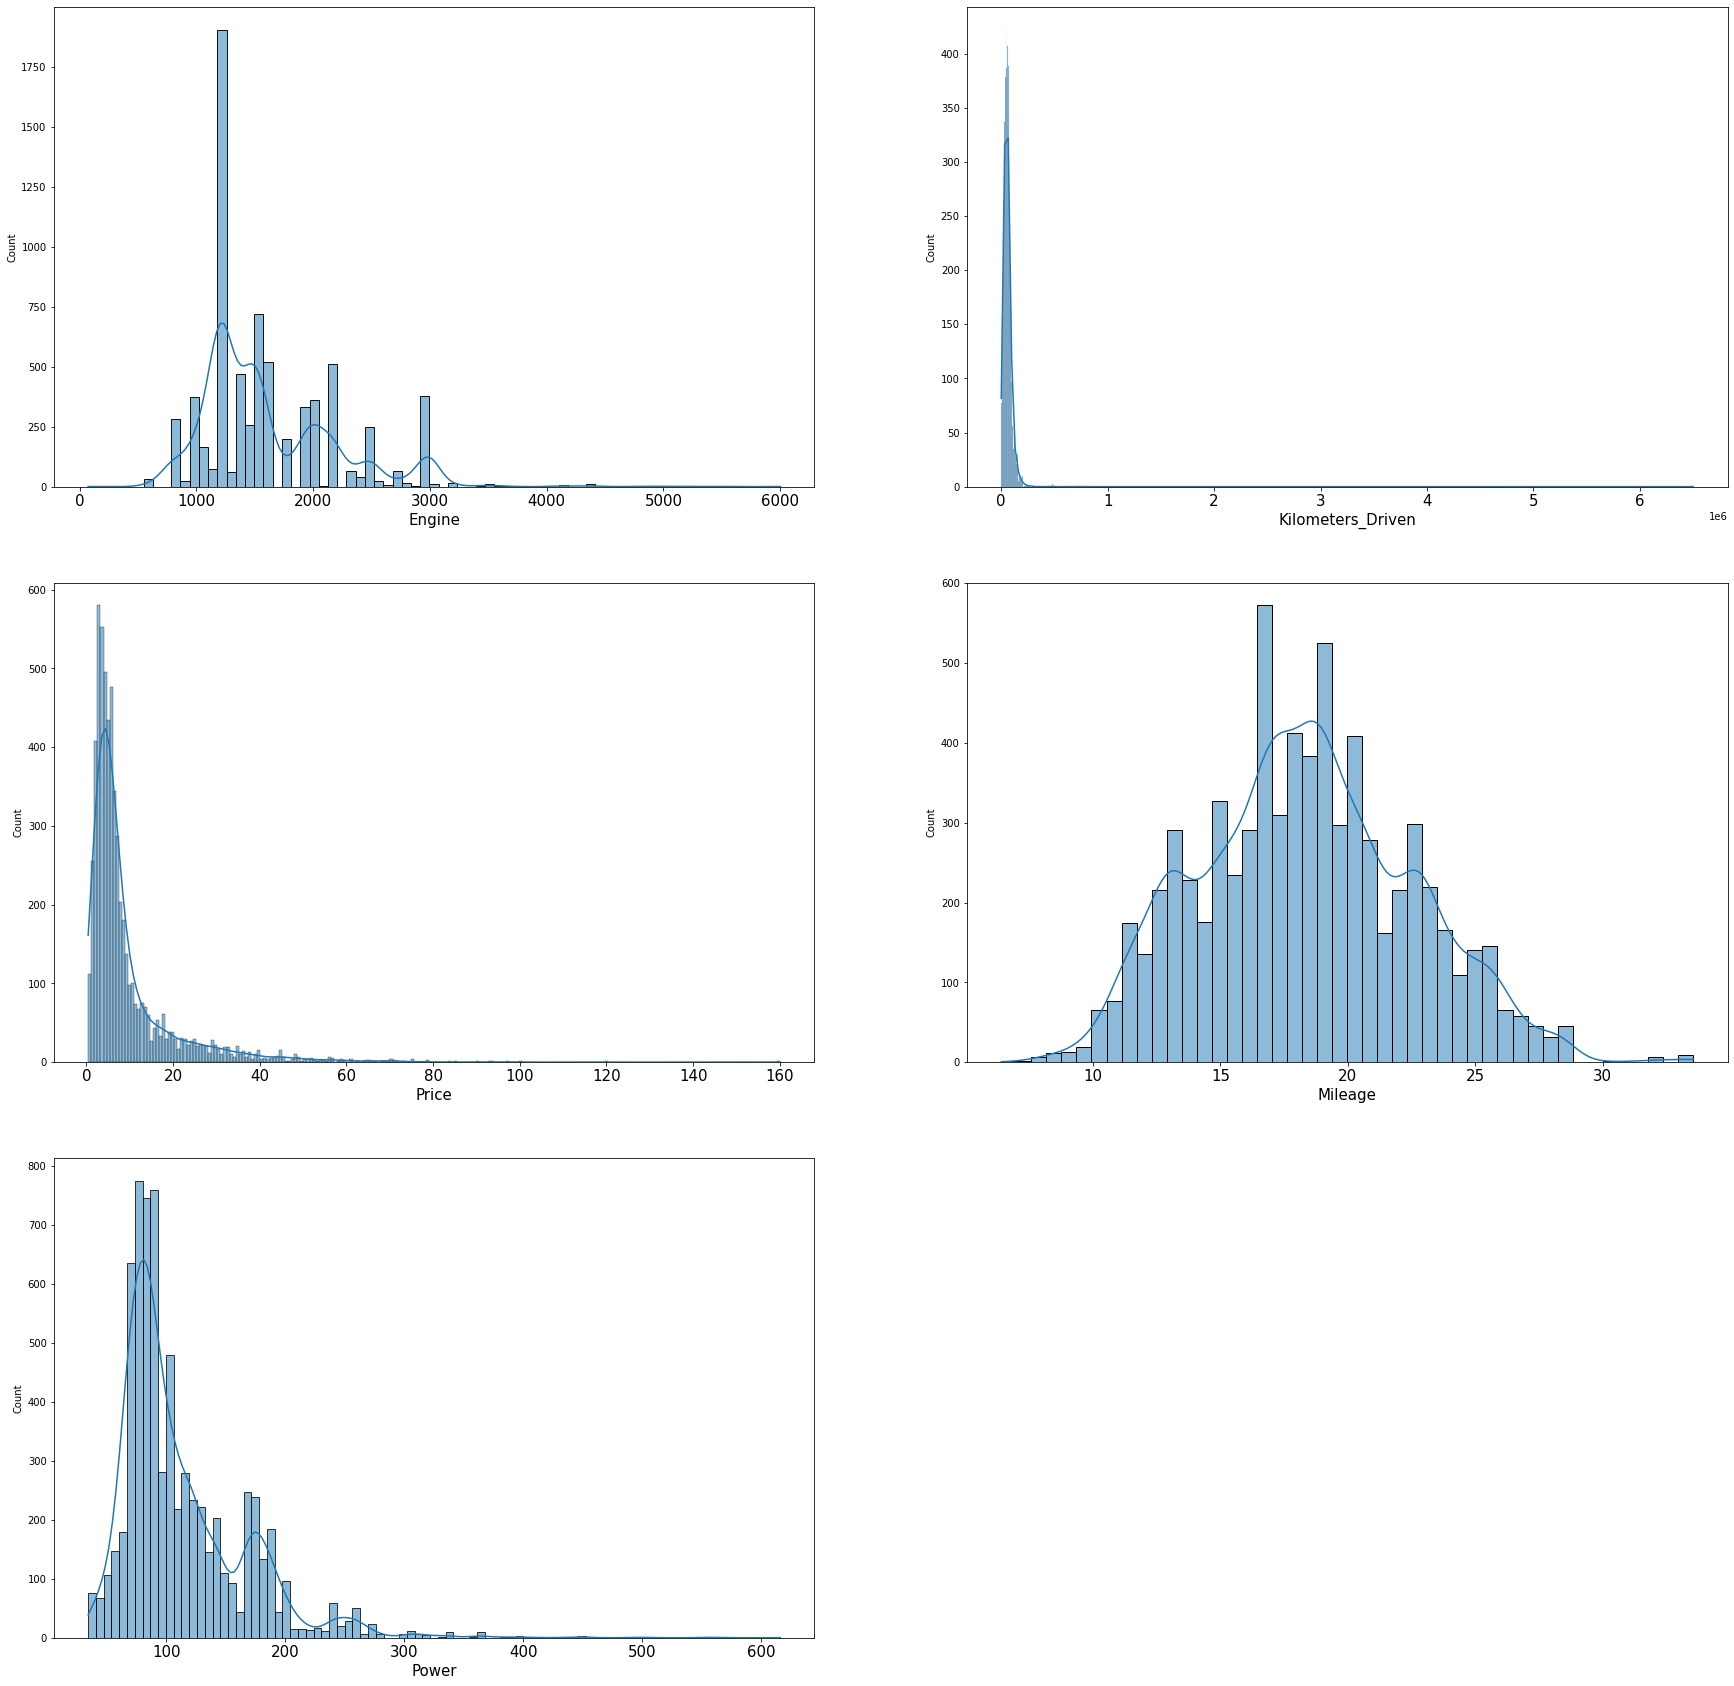

In [37]:
numerical_columns = list(set(df.columns) - set(categorical_columns))    # generate numercial_columns

plt.figure(figsize = (30, 30))     # histogram for numercial variables
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df[col], kde = True)
    plt.xticks(fontsize = 15)
    plt.xlabel(col, fontsize = 15)    

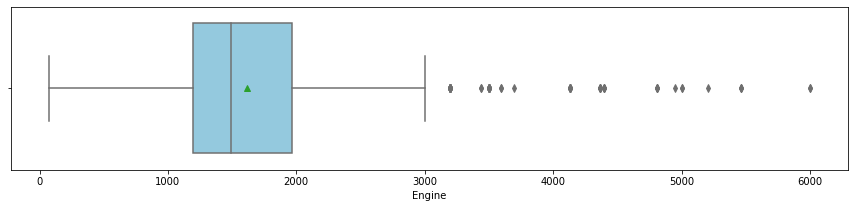

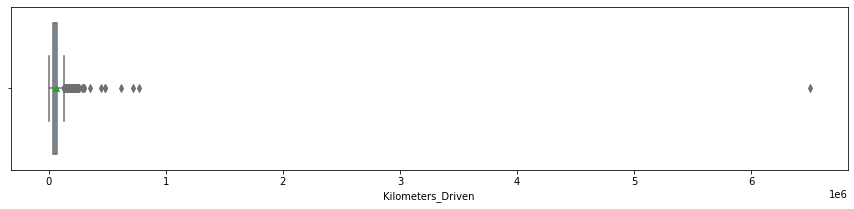

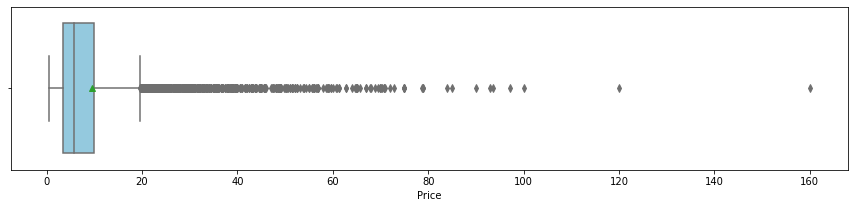

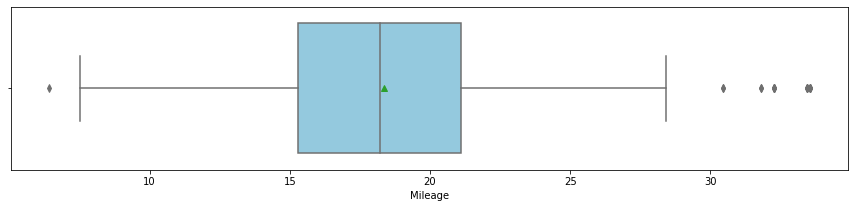

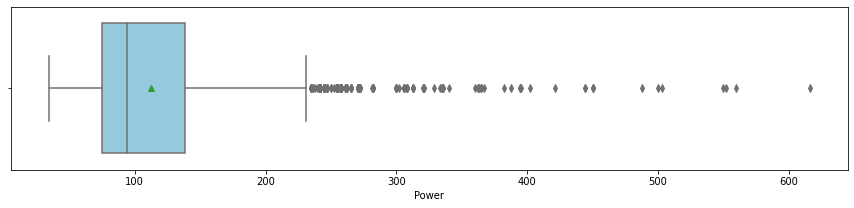

In [38]:
for i, col in enumerate(numerical_columns):
    plt.figure(figsize = (15, 3))     
    sns.boxplot(x = df[col], showmeans=True, color = 'skyblue')   # box plot for numercial variablesshow the position of mean

**Observation:**
- The distribution of Mileage approaches normal distribution. Others are far from normal distribution, with lots of outliers on the right. 

#### Coutplot of categorical variables

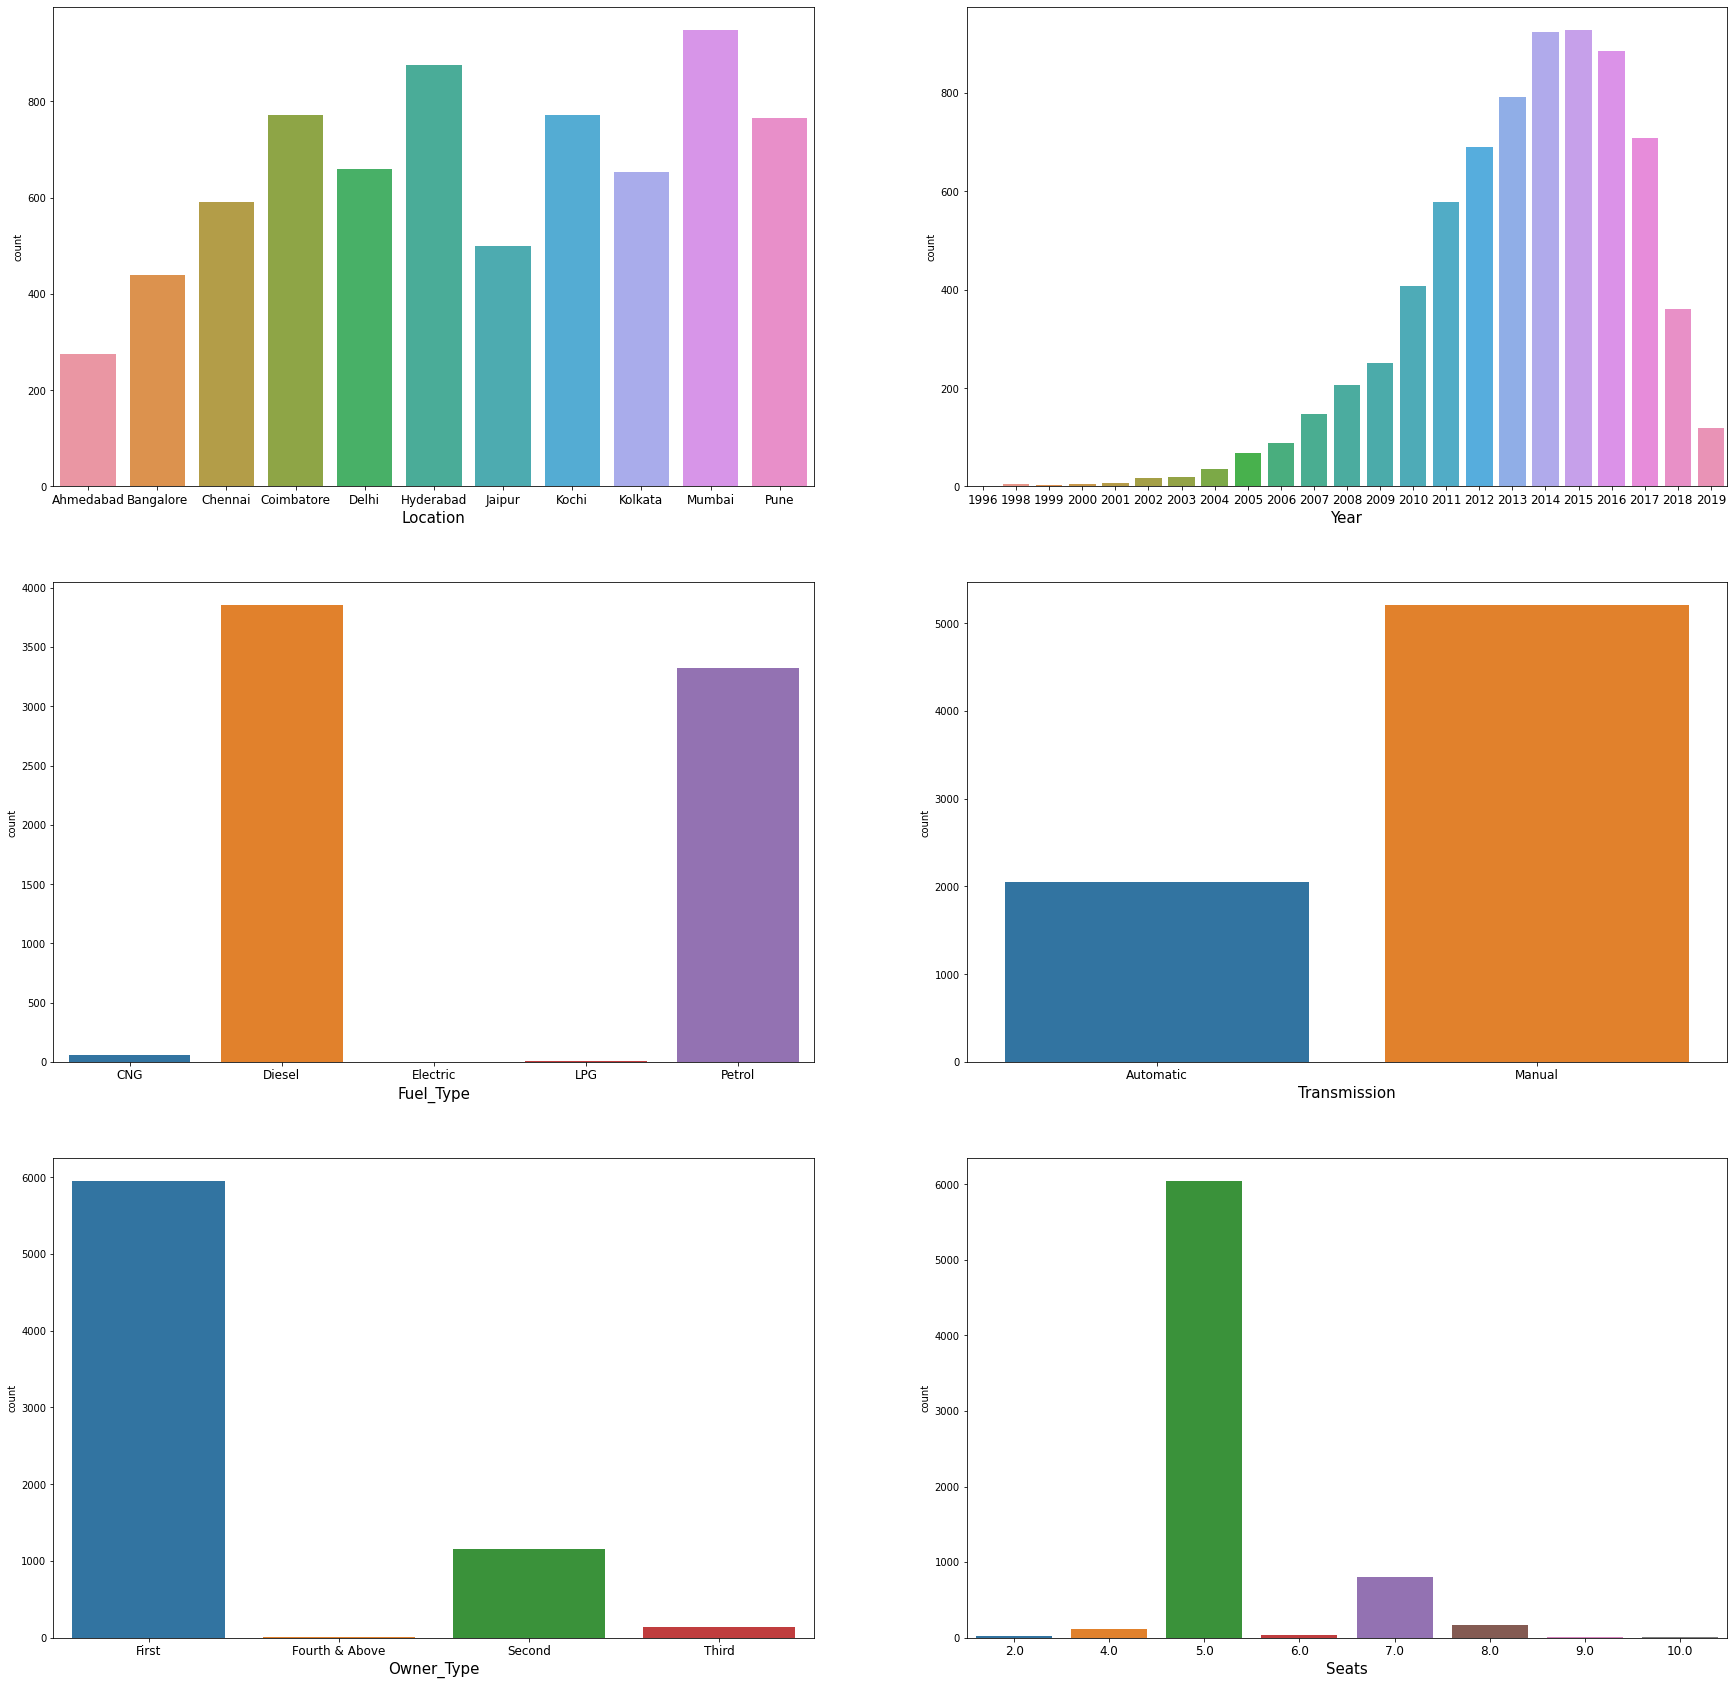

In [39]:
plt.figure(figsize = (30, 30)) 
for i, col in enumerate(categorical_columns[: -1]):  # categorical variables except Brand
    plt.subplot(3, 2, i + 1)
    sns.countplot(df[col])
    plt.xticks(fontsize = 12)
    plt.xlabel(col, fontsize = 15)    

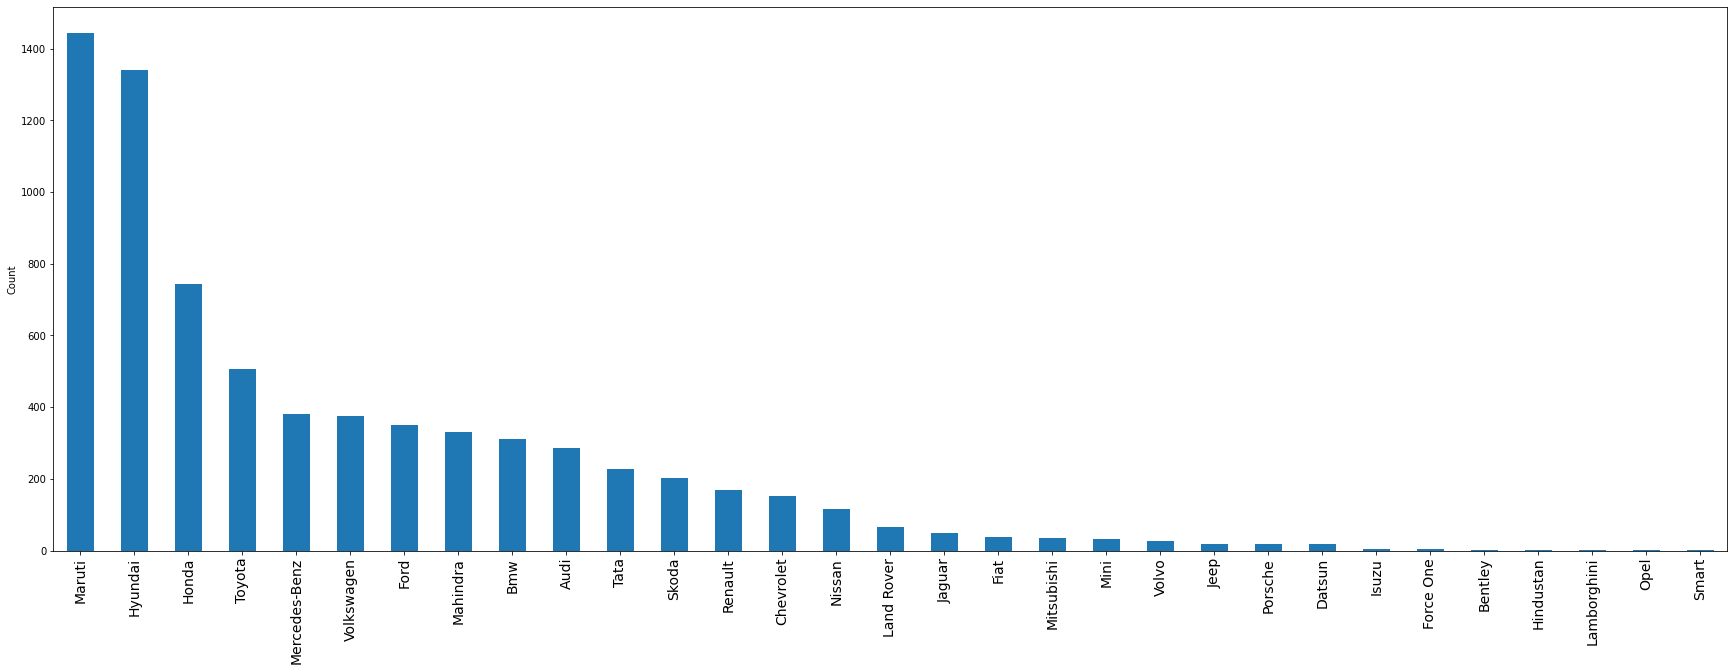

In [40]:
plt.figure(figsize = (30, 10))
df.Brand.value_counts().plot(kind = "bar")    # countplot for Brand
plt.ylabel('Count')
plt.xticks(fontsize = 14, rotation = 90);
plt.show()

**Observation:**
- Cars are approximately evenly distributed among 11 cities.
- Car were manufactured between 1996 - 2019, most between 2010 - 2018 and few before 2005.
- Most cars use Diesel and Petrol.
- Manual transmission cars are more than automatic transmission ones.
- Most cars have 1 or 2 previous owner(s) and 5 seats.
- The top three brands are Maruti, Hyundai and Honda.

### Bivariate Analysis

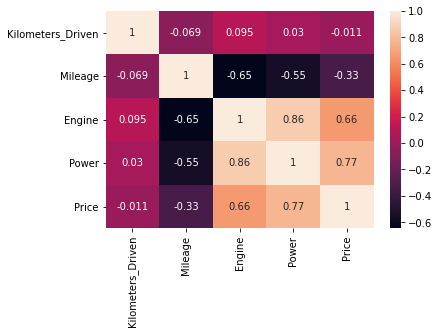

In [41]:
sns.heatmap(data = df.corr(), annot = True);   # generate heatmap

**Observation:** 
- Mileage and Engine/ Power are negatively correlated, while Engine and Power are positively correlated. Generally speaking, the higher an engine's displacement volume is, the more power it creates and more fuel it consumes.
- Price and Engine/ Power are positively correlated.

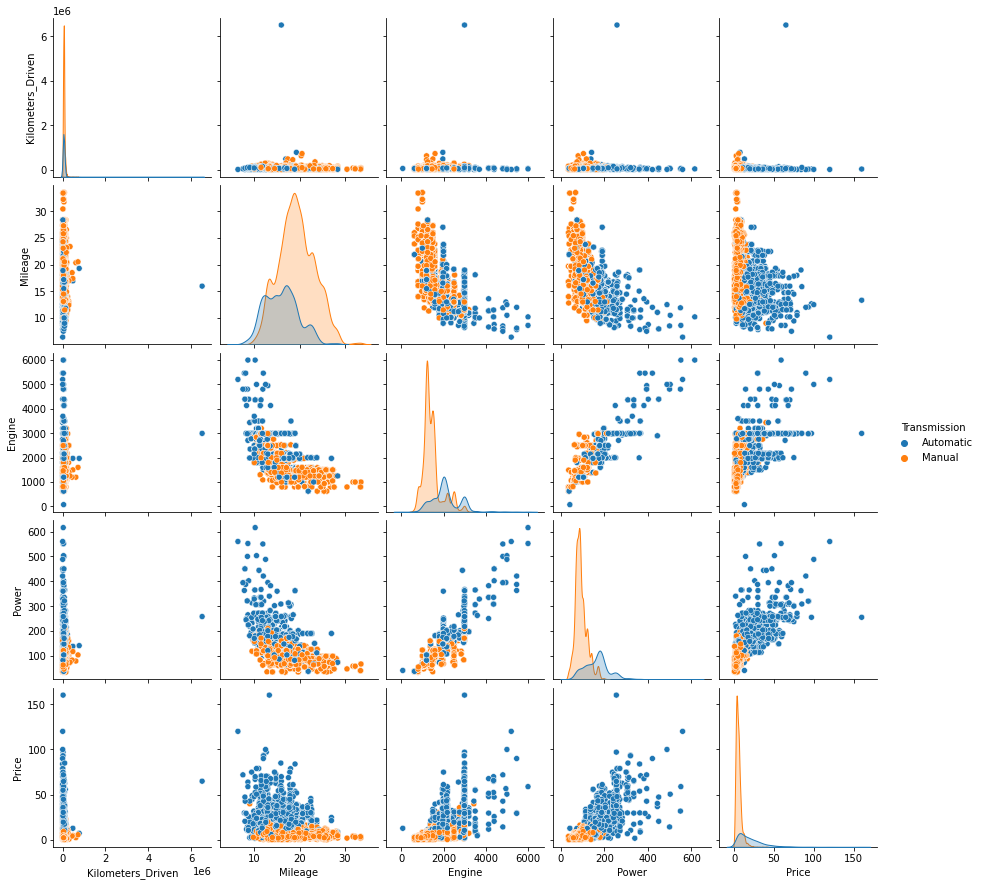

In [42]:
sns.pairplot(df, hue = 'Transmission');   # pairplot between numerical variables with hue = Transmission

**Observation:**
- Automatic transmission cars tend to have higher displacement volume, maximum power and price.
- Regardless of the type of transmission, Power and Engine shows high positive correlation, while Mileage and Engine/ Power shows negative correlation.
- Price is positively correlated with Engine/ Power.
- Kilometers_Driven doesn't have much correlation with other variables.

#### Price vs Brand

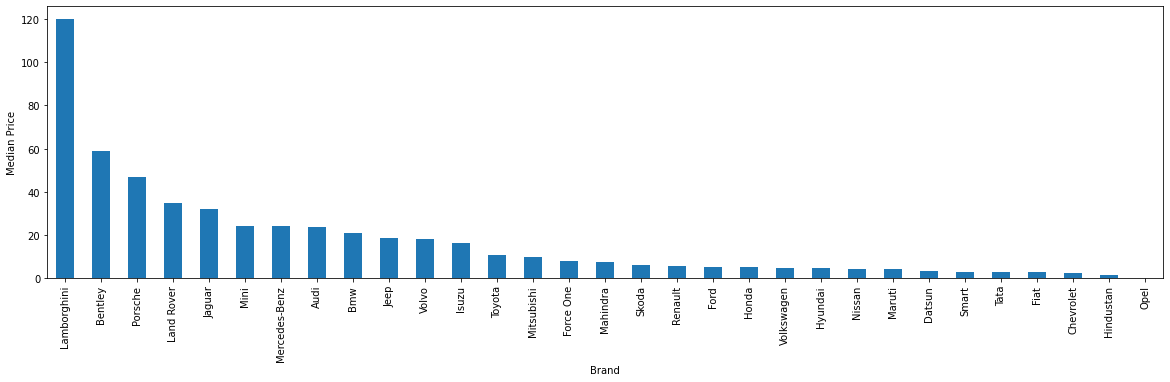

In [43]:
plt.figure(figsize = (20, 5))
df.groupby('Brand')['Price'].median().sort_values(ascending = False).plot(kind = 'bar')
plt.ylabel('Median Price')
plt.xticks(rotation = 90);

**Observation:** Price vary dramatically across brands. The top three are Lamborghini, Bentley and Porsche, all of which are luxury brands. Opel may have missing values at the Price column.

#### Power vs Brand

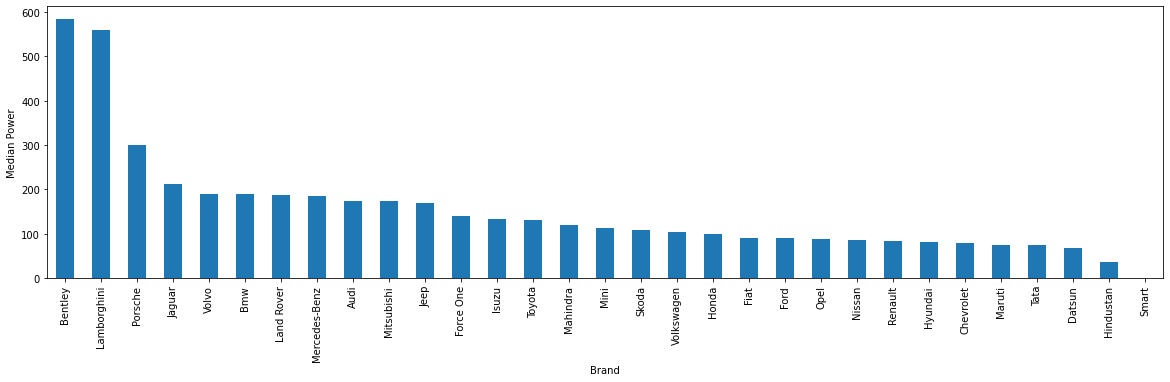

In [44]:
plt.figure(figsize = (20, 5))
df.groupby('Brand')['Power'].median().sort_values(ascending = False).plot(kind = 'bar')
plt.ylabel('Median Power')
plt.xticks(rotation = 90);

**Observation:** Power vary dramatically across brands. The top three are Bentley, Lamborghini and Porsche. Smart may have missing values at the Power column.

#### Engine vs Brand

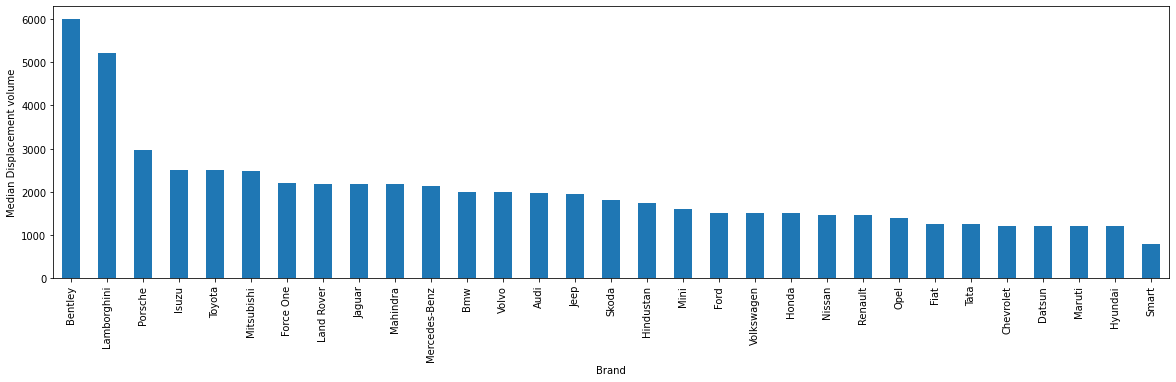

In [45]:
plt.figure(figsize = (20, 5))
df.groupby('Brand')['Engine'].median().sort_values(ascending = False).plot(kind = 'bar')
plt.ylabel('Median Displacement volume')
plt.xticks(rotation = 90);

**Observation:** Displacement volume vary dramatically across brands. The top three are Bentley, Lamborghini and Porsche. It's not surprising given the high correlation between Power and Engine. Others have similar values of displacement volume.

#### Mileage vs Brand

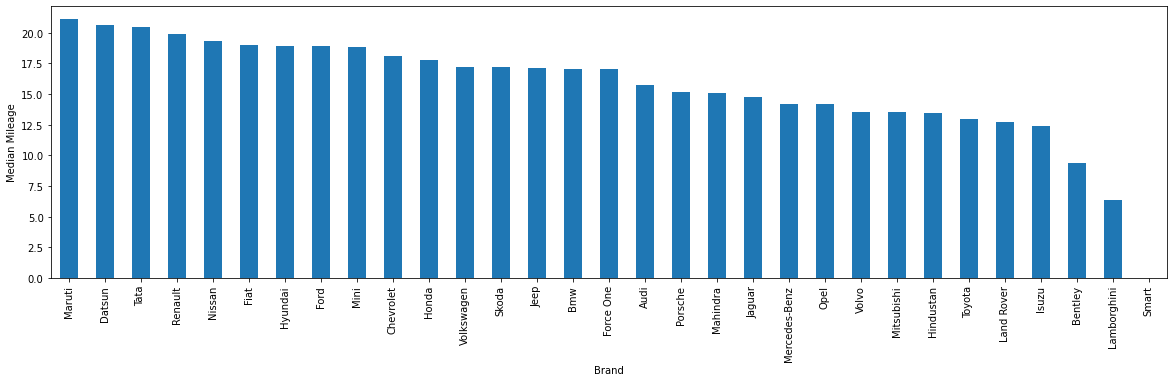

In [46]:
plt.figure(figsize = (20, 5))
df.groupby('Brand')['Mileage'].median().sort_values(ascending = False).plot(kind = 'bar')
plt.ylabel('Median Mileage')
plt.xticks(rotation = 90);

**Observation:** Economy cars tend to have higher Mileage (Fuel efficiency). Overall, Mileage doesn't differ significantly across various brands with the exception that Bentley and Lamborghini are less fuel-efficient. Smart may have missing values at the Mileage column.

#### Kilometers_Driven vs Brand

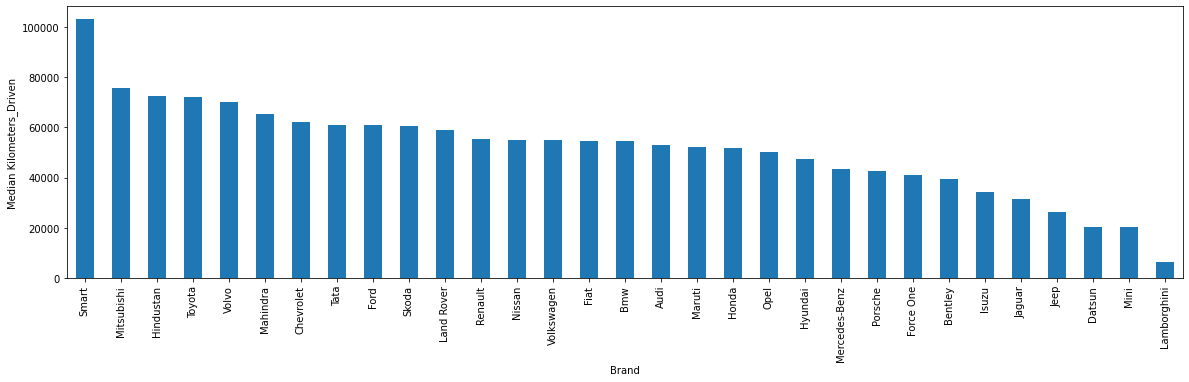

In [47]:
plt.figure(figsize = (20, 5))
df.groupby('Brand')['Kilometers_Driven'].median().sort_values(ascending = False).plot(kind = 'bar')
plt.ylabel('Median Kilometers_Driven')
plt.xticks(rotation = 90);

**Observation:** Economy brands have higher Kilometers_Driven. Maybe because they're more affordable and more likely to be used in daily life.

#### Price vs Seats

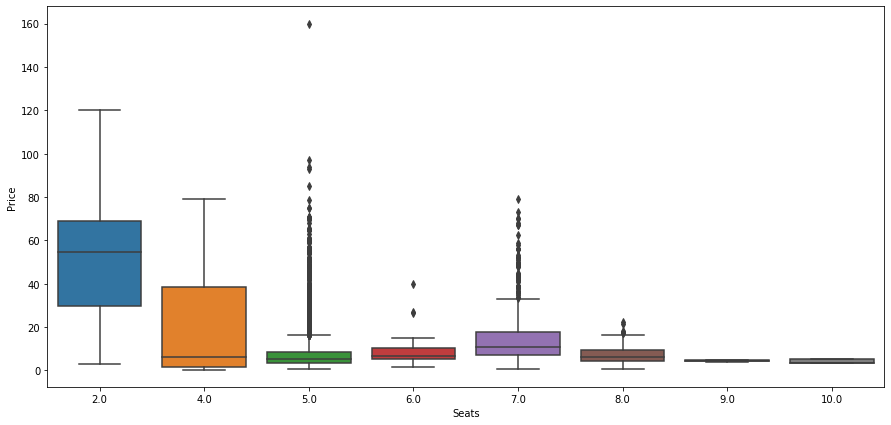

In [48]:
plt.figure(figsize = (15,7))
sns.boxplot(x = 'Seats', y = 'Price', data = df);

In [49]:
df.loc[df.Seats == 2]    # check cars with Seats == 2

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
134,Kolkata,2017,13372,Petrol,Automatic,First,19.0000,"2,996.0000",362.0700,2.0000,54.0000,Mercedes-Benz
557,Delhi,2013,12100,Petrol,Automatic,First,9.9000,"1,984.0000",207.8000,2.0000,29.5000,Audi
693,Coimbatore,2016,22732,Petrol,Automatic,First,18.1000,"3,498.0000",306.0000,2.0000,55.5400,Mercedes-Benz
798,Bangalore,2015,10000,Petrol,Automatic,First,18.1000,"3,498.0000",306.0000,2.0000,55.0000,Mercedes-Benz
915,Pune,2008,103000,Diesel,Automatic,Second,NaN,799.0000,NaN,2.0000,3.0000,Smart
926,Hyderabad,2010,10000,Petrol,Manual,First,9.0000,"3,436.0000",NaN,2.0000,40.0000,Porsche
1078,Kolkata,2015,10512,Petrol,Automatic,First,8.6000,"2,706.0000",265.0000,2.0000,64.0000,Porsche
1288,Kochi,2014,14262,Petrol,Automatic,First,9.9000,"1,984.0000",207.8000,2.0000,27.3500,Audi
2095,Coimbatore,2019,2526,Petrol,Automatic,First,19.0000,"2,996.0000",362.0700,2.0000,83.9600,Mercedes-Benz
2305,Mumbai,2011,8000,Petrol,Automatic,First,9.0000,"3,436.0000",NaN,2.0000,43.0000,Porsche


In [50]:
df.loc[(df.Seats == 9) | (df.Seats == 10)]   # check cars with Seats == 9 and Seats == 10

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
814,Pune,2004,77757,Diesel,Manual,Second,13.1000,"2,446.0000",75.0000,10.0000,3.5000,Toyota
917,Mumbai,2013,20000,Diesel,Manual,First,14.0700,"1,978.0000",83.1000,10.0000,5.2500,Tata
1347,Bangalore,2007,74112,Diesel,Manual,First,12.0500,"2,179.0000",120.0000,9.0000,4.1000,Mahindra
1907,Bangalore,2002,63000,Diesel,Manual,Third,13.1000,"2,446.0000",75.0000,10.0000,3.6500,Toyota
2267,Pune,2004,215750,Diesel,Manual,Second,NaN,"2,446.0000",NaN,10.0000,3.5000,Toyota
2312,Kolkata,2012,67132,Diesel,Manual,First,13.5800,"2,499.0000",78.0000,9.0000,4.7500,Chevrolet
2359,Chennai,2016,150000,Diesel,Manual,First,14.9500,"2,489.0000",93.7000,9.0000,4.5000,Mahindra
2575,Hyderabad,2015,120000,Diesel,Manual,First,14.8000,"2,499.0000",80.0000,10.0000,5.5000,Chevrolet
6242,Chennai,2015,196000,Diesel,Manual,Second,12.2000,"1,948.0000",68.0000,10.0000,NaN,Tata
6288,Hyderabad,2005,150000,Diesel,Manual,Second,14.8000,"2,499.0000",80.0000,10.0000,NaN,Chevrolet


**Observation:** Cars with 2 seats are more expensive than other types. Cars in this category fall into high-end brands, automatic transmission and petrol fuel. Cars with more than 8 seats tend to have lower price. Cars in this category fall into economy brands, manual transmission and diesel fuel. 

#### Price vs Owner_Type

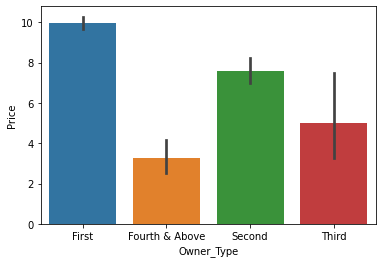

In [51]:
sns.barplot(x = 'Owner_Type', y = 'Price', data = df);

**Observation:** The fewer previous owner it has, the higher the price is.

#### Price vs Transmission

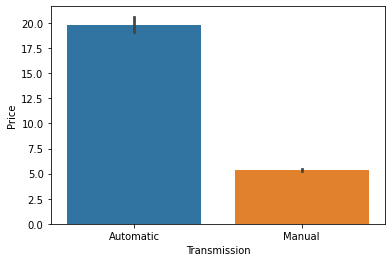

In [52]:
sns.barplot(x = 'Transmission', y = 'Price', data = df);

**Observation:** Automatic transmission cars are more expensive.

#### Price vs Fuel_Type

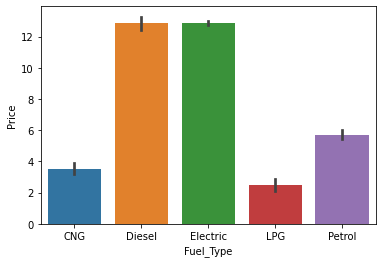

In [53]:
sns.barplot(x = 'Fuel_Type', y = 'Price', data = df);

**Observation:** Electric cars and diesel cars are the most expensive. Cars using gases are the most affordable.

#### Price vs Year

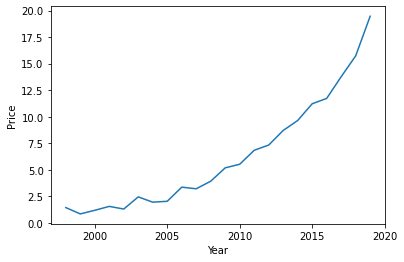

In [54]:
sns.lineplot(x = 'Year', y = 'Price', data = df, ci = None);

**Observation:** The newer the car, the higher the price.

#### Price vs Location

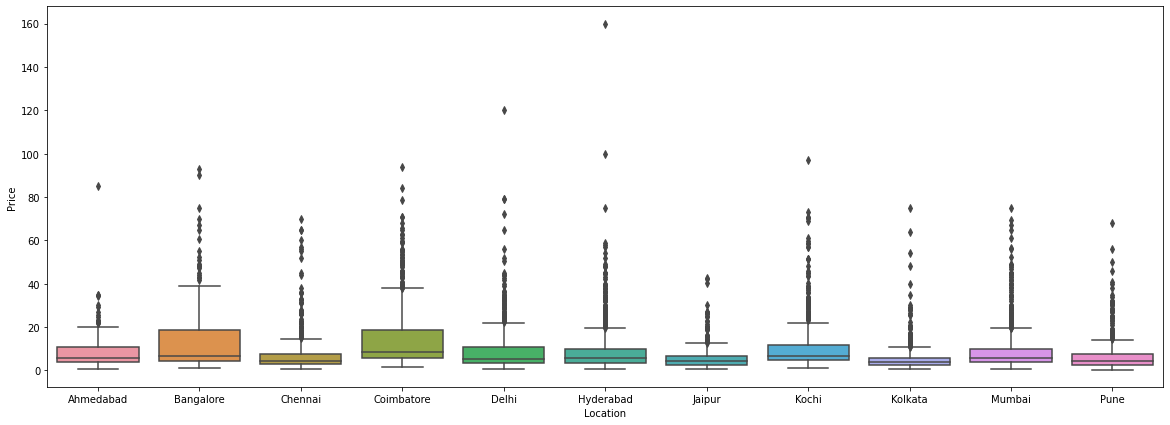

In [55]:
plt.figure(figsize = (20, 7))
sns.boxplot(x = 'Location', y = 'Price', data = df);

**Observation:** Median price is similar at different locations. Bangalore and Coimbatore have higher price than other cities.

#### Fuel_Type vs Transmission

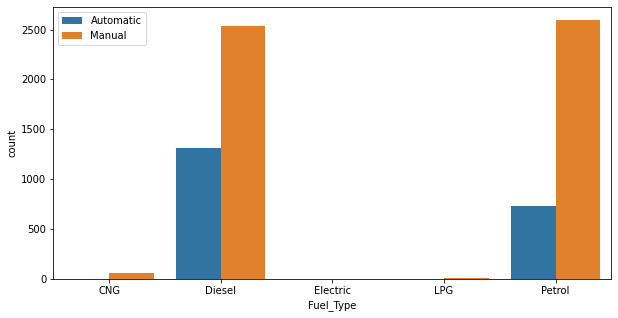

In [56]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'Fuel_Type', data = df, hue = 'Transmission');
plt.legend(loc = 'upper left');

**Observation:**  LPG and CNG cars only have manual transmission. Electric cars only have automatic transmission. Diesel cars and petrol cars have both transmissions, but more manual ones than automatic ones.

#### Price vs Transmission vs Brand

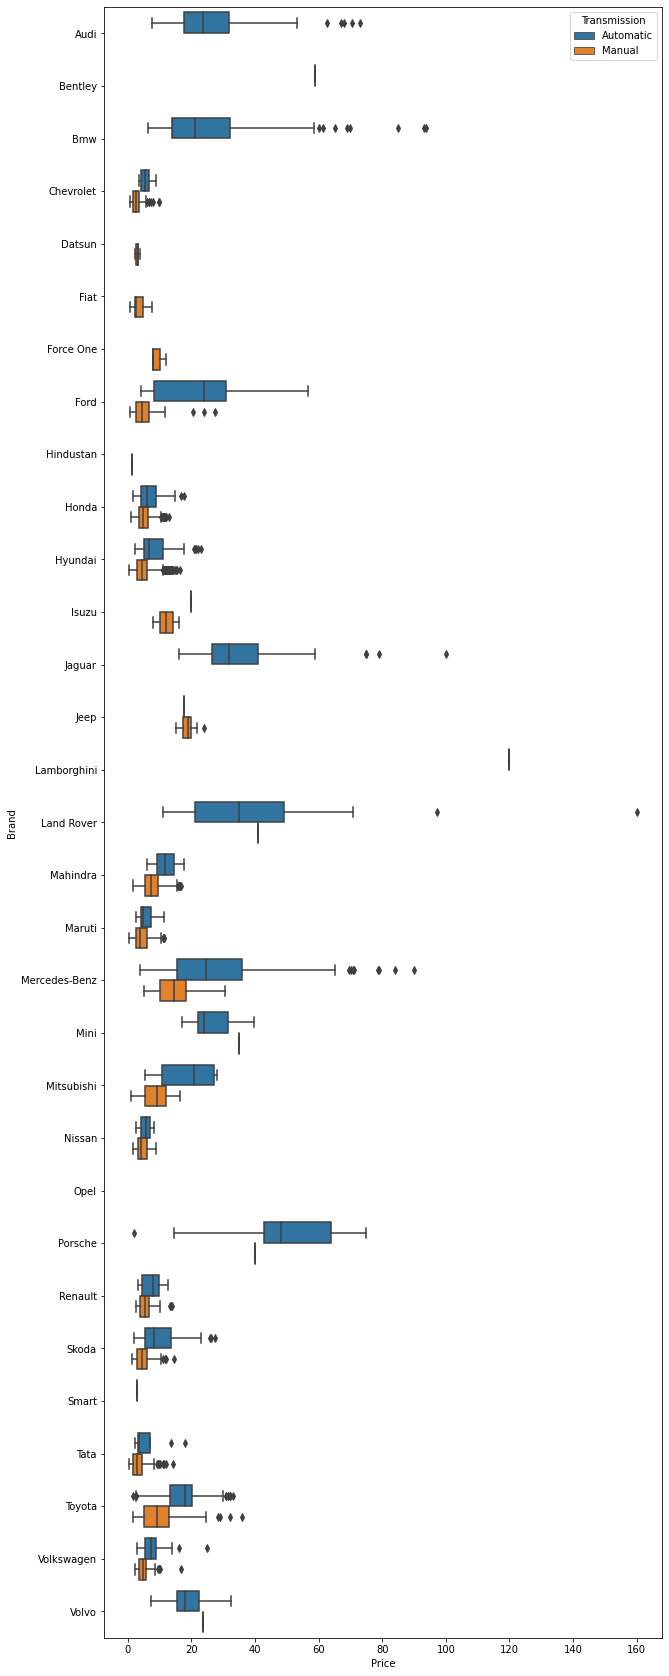

In [57]:
plt.figure(figsize = (10, 30))
sns.boxplot(y = 'Brand', x = 'Price', hue = 'Transmission', data =df);

**Observation:** The price for automatic transmission cars is higher for each brand.

 #### Price vs Fuel_Type vs Brand

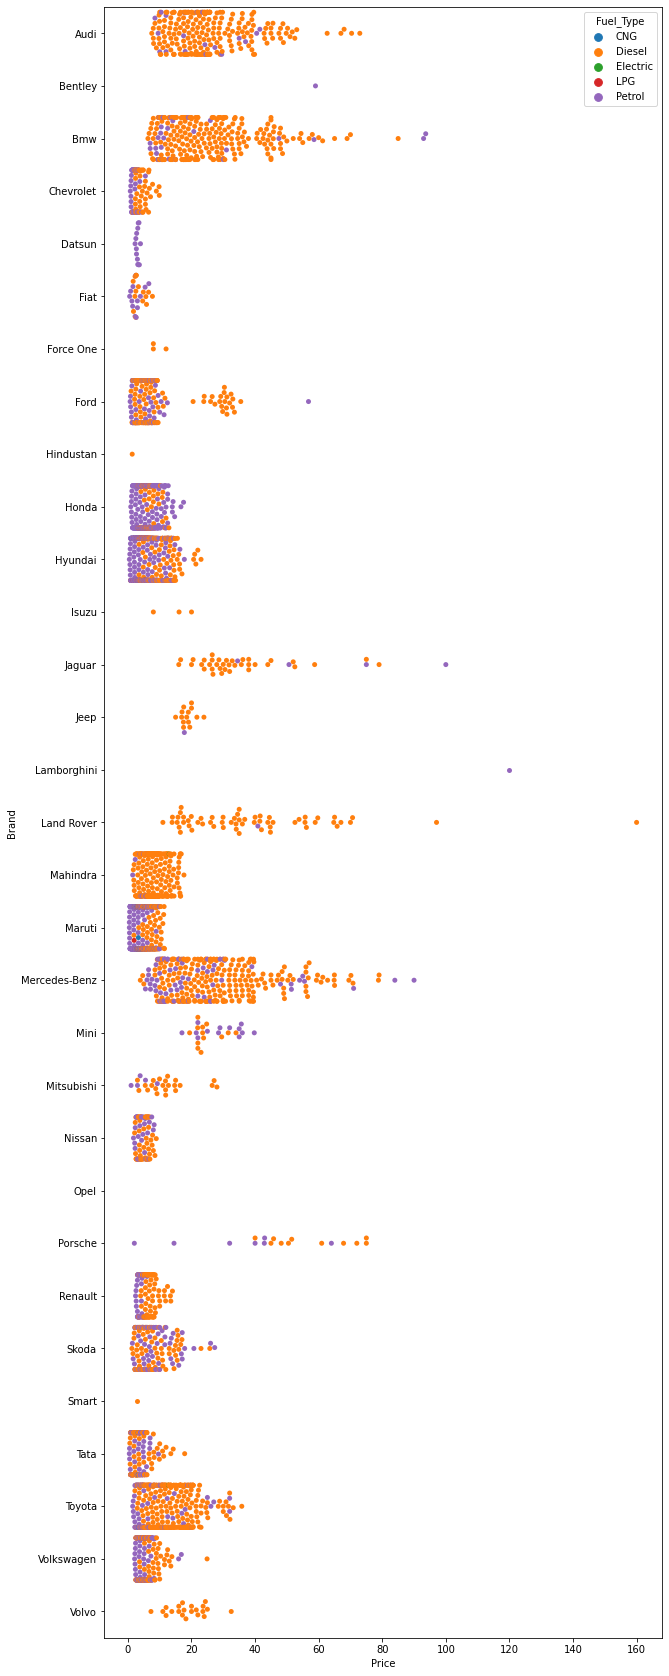

In [58]:
plt.figure(figsize = (10, 30))
sns.swarmplot(y = 'Brand', x = 'Price', hue = 'Fuel_Type', data = df);

**Observation:** Diesel cars are more expensive than petrol cars for all brands except Honda.

#### Power vs Fuel_Type

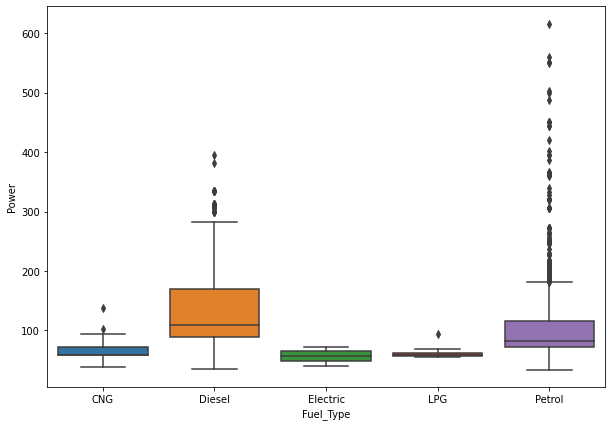

In [59]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Fuel_Type', y = 'Power', data = df);

**Observation:** Electric/ LPG/ CNG cars have similar power level, which is lower than that of diesel cars and petrol cars. Diesel cars have higher power than petrol cars.

#### Power vs Transmission

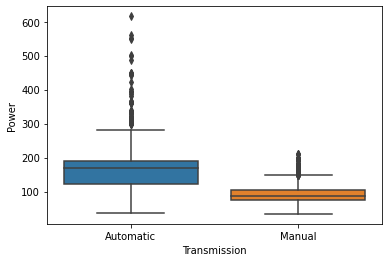

In [60]:
sns.boxplot(x = 'Transmission', y = 'Power', data = df);

**Observation:** Automatic transmission cars have higher power.

#### Year vs Power

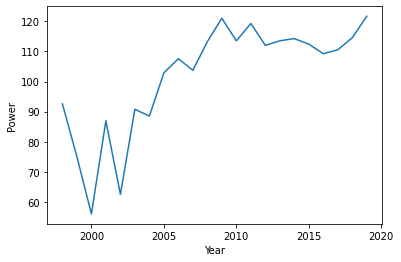

In [61]:
sns.lineplot(x = 'Year', y = 'Power', data = df, ci = None);

**Observation:** Power increases over year.

#### Engine vs Fuel_Type

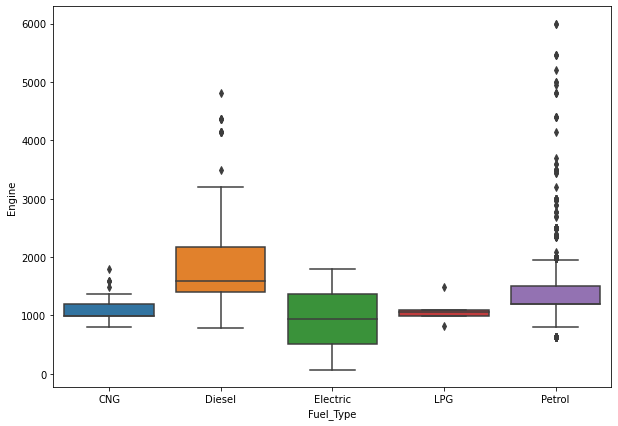

In [62]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Fuel_Type', y = 'Engine', data = df);

**Observation:** Electric cars have the lowest displacement volume. Diesel cars have the highest displacement volume.

#### Mileage vs Fuel_Type

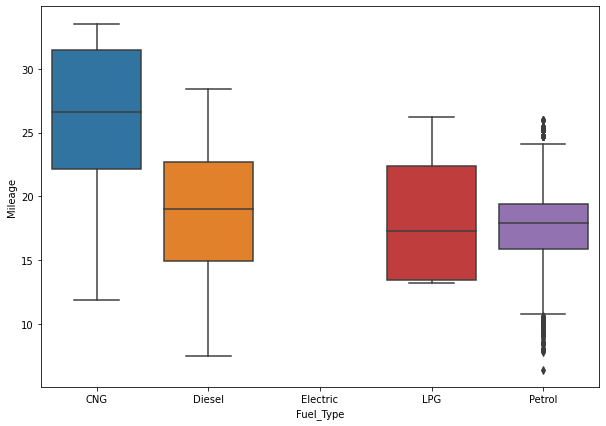

In [63]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Fuel_Type', y = 'Mileage', data = df);

**Observation:** Median of Mileage for Diesel, LPG and Petrol cars is similar. CNG cars have higher Mileage. Electric cars may have missing values at Mileage column.

#### Tansmission vs Mileage

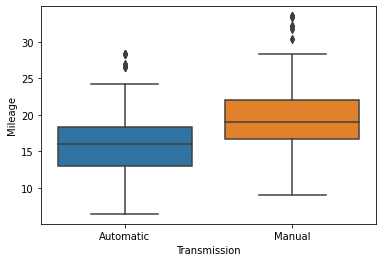

In [64]:
sns.boxplot(x = 'Transmission', y = 'Mileage', data = df);

**Observation:** Manual transmission cars have higher Mileage.

#### Year vs Mileage

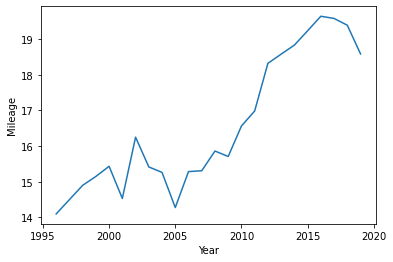

In [65]:
sns.lineplot(x = 'Year', y = 'Mileage', data = df, ci = None);

**Observation:** New cars have higher Mileage.

#### Power vs Year vs Fuel_Type

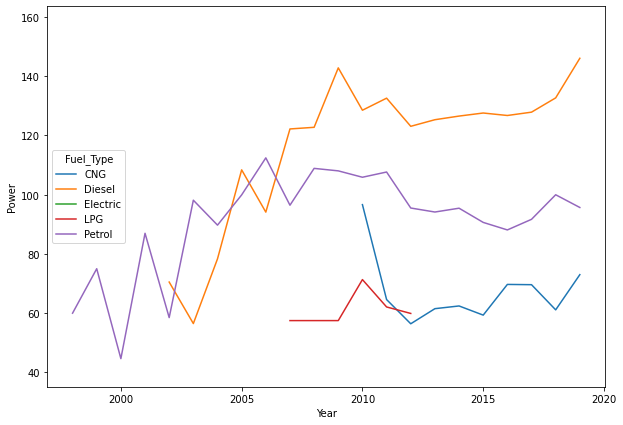

In [66]:
plt.figure(figsize = (10,7))
sns.lineplot(x = 'Year', y = 'Power', hue = 'Fuel_Type', data = df, ci = None);

In [67]:
df.loc[df.Fuel_Type == 'Electric']  # only two electric cars

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
4446,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0000,41.0000,5.0000,13.0000,Mahindra
4904,Mumbai,2011,44000,Electric,Automatic,First,NaN,"1,798.0000",73.0000,5.0000,12.7500,Toyota


**Observation:** The power of diesel cars increases over years. This applies to petrol cars prior to 2005 and the Power doesn't change much after that. LPG cars and CNG cars have stable power. Electric cars don't show on the plot due to too few data points in our data set.

#### Year vs Transmission

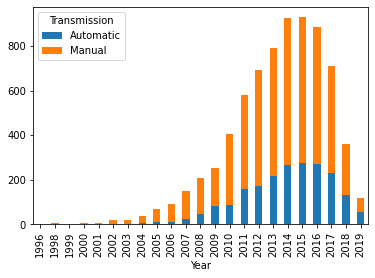

In [68]:
pd.crosstab(index = df['Year'], columns = df['Transmission']).plot(kind = 'bar', stacked = True);

**Observation:** Both show a first ascending then descending trend. Manual transmission cars are dominant each year.

#### Year vs Kilometers_Driven

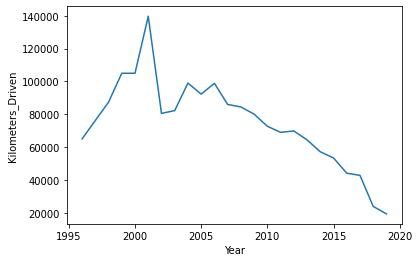

In [69]:
sns.lineplot(x = 'Year', y = 'Kilometers_Driven', data = df, ci = None);

**Observation:** Overal, newer cars have lower Kilometers_Driven. But the ascending section for cars manufacured prior to 2000 and a dip for cars between 2000 - 2005 need further investigation. 

#### Owner_Type vs Kilometers_Driven

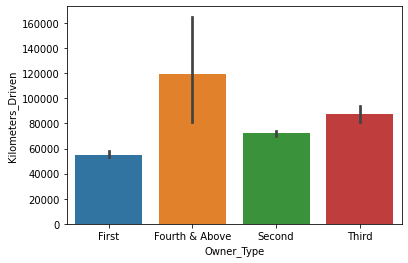

In [70]:
sns.barplot(x = 'Owner_Type', y = 'Kilometers_Driven', data = df);

**Observation:** Kilometers_Driven increases with the number of previous owners.

In [71]:
phase4 = df.copy()   # for debug use !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [72]:
df = phase4.copy() # univariate analysis and bivariate analysis completed. for debug use !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

### Data preprocessing - part 2

#### Fill missing values

In [73]:
missing_value_df = pd.DataFrame(df.isnull().sum().sort_values(ascending = False), columns = ['No. of missing values'])   # check missing values
missing_value_df['percentage'] = 100 * missing_value_df.iloc[:,0] / df.shape[0]   # percentage of the number of missing values to total observations
missing_value_df

,No. of missing values,percentage
Price,1234,17.0136
Power,175,2.4128
Mileage,83,1.1444
Seats,54,0.7445
Engine,46,0.6342
Location,0,0.0000
Year,0,0.0000
Kilometers_Driven,0,0.0000
Fuel_Type,0,0.0000
Transmission,0,0.0000


As we see the distributions of most numerical variables are very skewed. Better use median rather than mean to fill missing values.

In [74]:
# fill numerical columns with median
df[['Mileage', 'Engine', 'Power', 'Price']] = df[['Mileage', 'Engine', 'Power', 'Price']].apply(lambda x: x.fillna(x.median()))

# fill categorical columns with mode
df['Seats'].fillna(df['Seats'].mode()[0], inplace = True)

In [75]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,"7,253.0000",23.0000,"2,015.0000",929.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kilometers_Driven,"7,253.0000",NaN,NaN,NaN,"58,699.0631","84,427.7206",171.0000,"34,000.0000","53,416.0000","73,000.0000","6,500,000.0000"
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,"7,253.0000",NaN,NaN,NaN,18.3449,4.1341,6.4000,15.4000,18.2000,21.1000,33.5400
Engine,"7,253.0000",NaN,NaN,NaN,"1,615.7897",593.4753,72.0000,"1,198.0000","1,493.0000","1,968.0000","5,998.0000"
Power,"7,253.0000",NaN,NaN,NaN,112.3124,52.9226,34.2000,77.0000,94.0000,138.0300,616.0000
Seats,"7,253.0000",8.0000,5.0000,"6,101.0000",NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observation:** No missing values and minimum of numerical variables are positive.

In [76]:
phase5 = df.copy()   # for debug use !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [77]:
df = phase5.copy()  # fillna completed. for debug use !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

#### Scaling and transformation

As the earlier univariate analysis shows, Kilometers_Driven, Engine and Power have very skewed distribution. Need to transform them to a distributions close to normal distribution.

In [78]:
skewed_columns = ['Kilometers_Driven', 'Engine', 'Power']    # columns that need to be transformed

In [79]:
def plot_distribution(columns, status): # plot the distribution
    """
    input:
    columns: columns need to be transformed. List of column names.
    status: "before" or "after". String.
    
    output:
    None.
    """
    plt.figure(figsize = (40,7))
    n = len(columns)
    for i, col in enumerate(columns):          
        plt.subplot(1, n, 1 + i)
        sns.histplot(df[col]);
        plt.title(col + ' ' + status + ' transformation');      

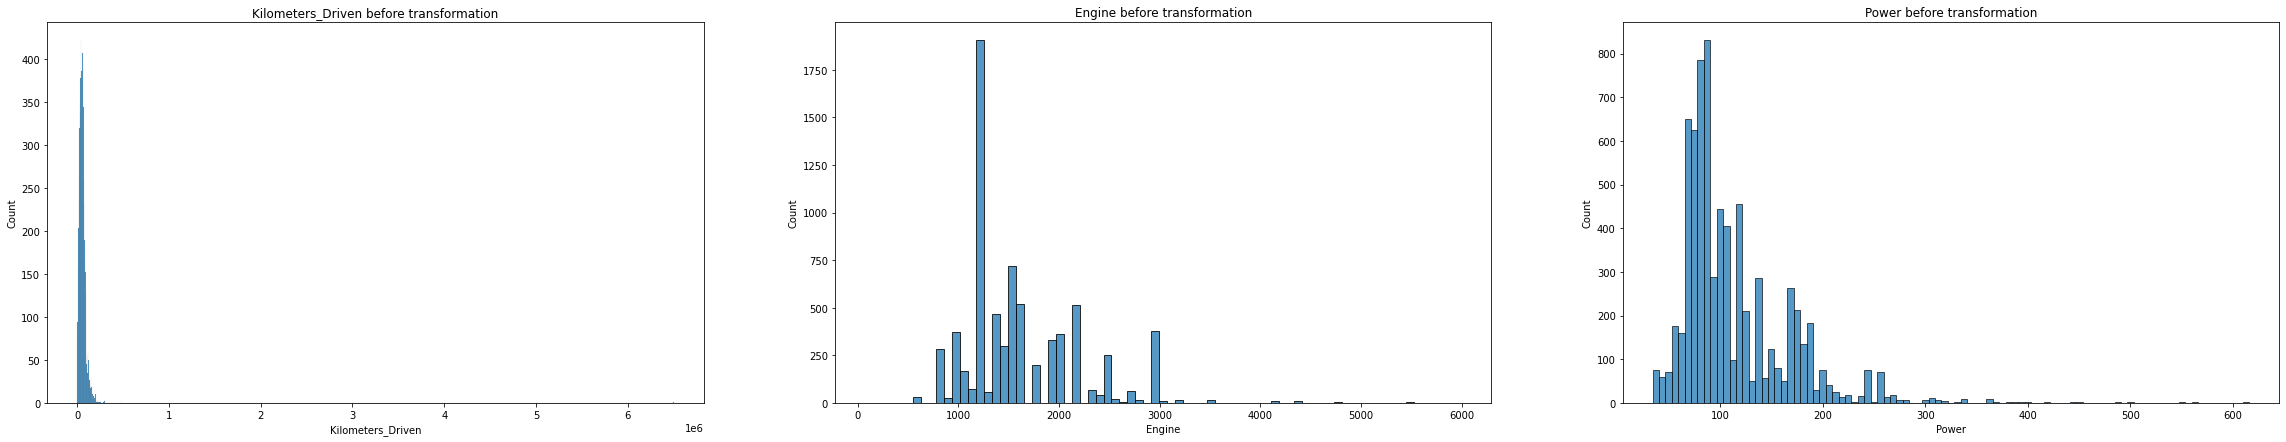

In [80]:
plot_distribution(skewed_columns, 'before')

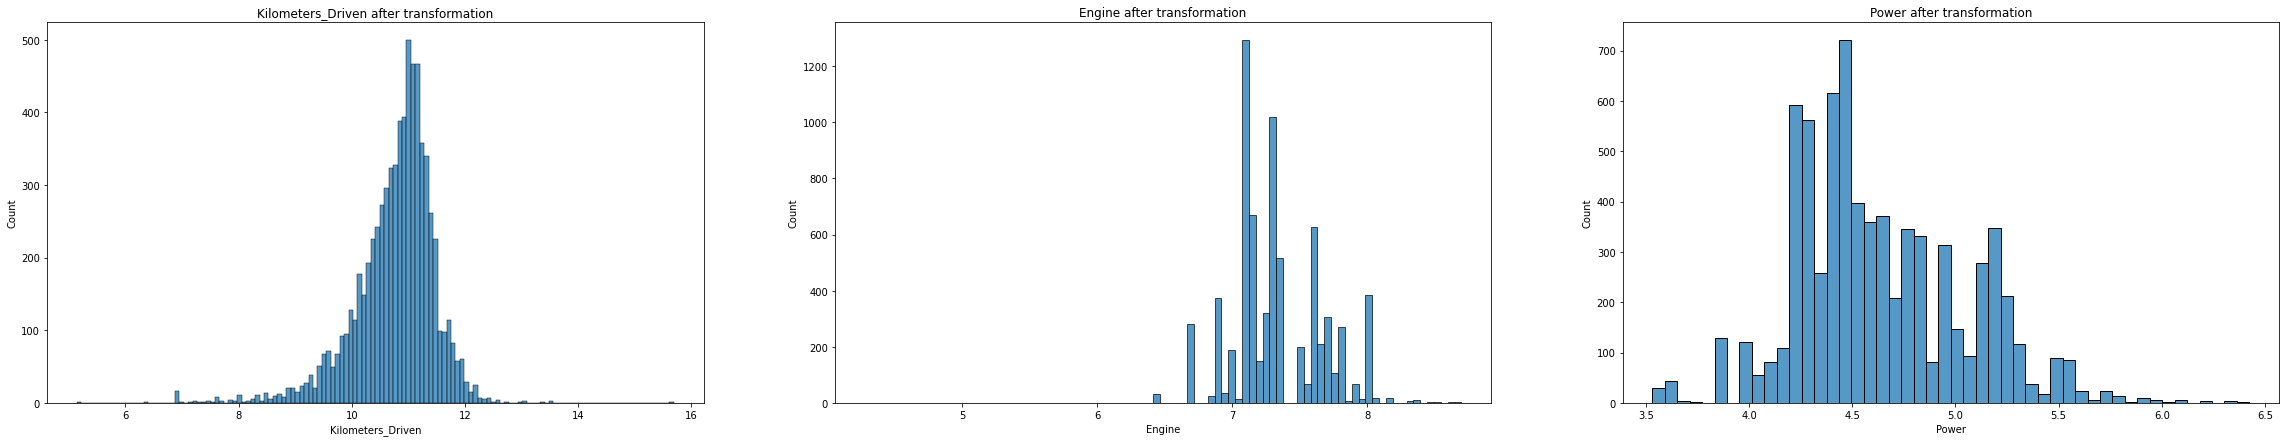

In [81]:
for col in skewed_columns:
    df[col] = np.log(df[col])   # perform log transformation
#     df[col] = PowerTransformer(method = 'yeo-johnson').fit_transform(df[[col]])    # perform PowerTransformer
#     df[col] = StandardScaler().fit_transform(df[[col]])   # perform StandardScaler

plot_distribution(skewed_columns, 'after')

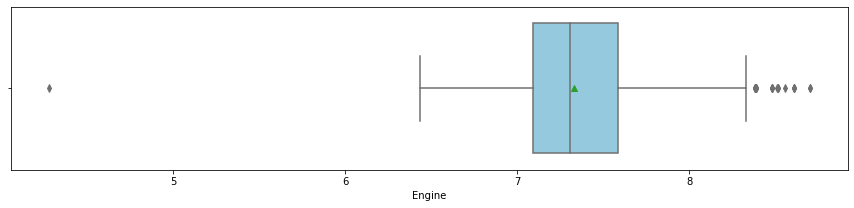

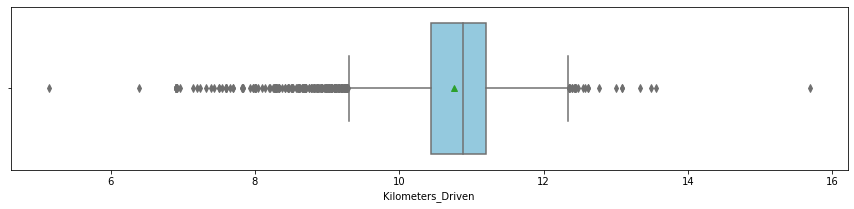

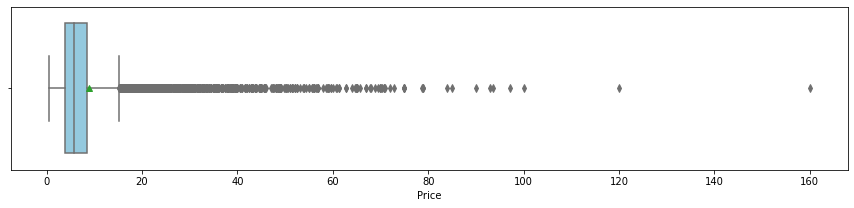

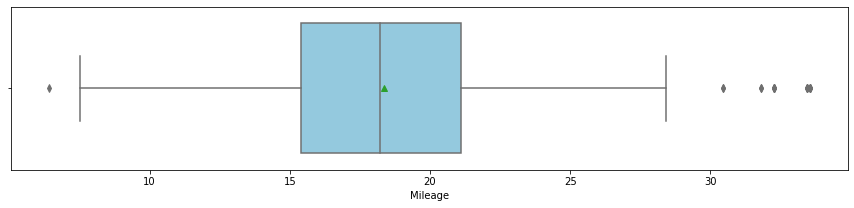

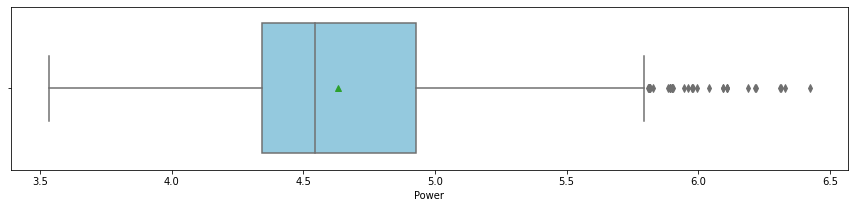

In [82]:
for i, col in enumerate(numerical_columns):
    plt.figure(figsize = (15, 3))    
    sns.boxplot(x = df[col], showmeans=True, color = 'skyblue')   # box plot for numercial variables, show the position of mean

**Observation:** The transformation reduces the skewness and the magnitudes for all the independent variables are comparable. But there're still a number of outliers.

In [83]:
phase6 = df.copy()   # for debug use !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [84]:
df = phase6.copy() # transformation completed. for debug use !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

#### Outlier treatment

In [85]:
# clip column based on IQR or bound
def outlier_clip(col, quantile_left = 0.25, quantile_right = 0.75, n = 1.5, bound_left = None, bound_right = None):
    """
    input:
    col: the name of column that needs to be clipped. String.
    quantile_left: left quantile. float.
    quantile_right: right quantile. float.
    n: multiples of (quantile_right - quantile_left). float.
    bound_left: left bound. float.
    bound_right: right bound. float.
    
    output:
    None.
    """
    if not bound_left and not bound_right:  # use quantile
        q1, q3 = df[col].quantile(quantile_left), df[col].quantile(quantile_right)
        IQR =  q3 - q1 
        df[col].clip(lower = q1 - n * IQR, upper = q3 + n * IQR, axis = 0, inplace = True)
    else:    # use bound
        df[col].clip(lower = bound_left, upper = bound_right, axis = 0, inplace = True)

In [86]:
# outlier_clip('Kilometers_Driven', bound_left = -3, bound_right = 3)
# outlier_clip('Mileage')
# outlier_clip('Engine')
# outlier_clip('Power')
# outlier_clip('Price', bound_left = 0, bound_right = 40)

for col in numerical_columns:
    outlier_clip(col)    

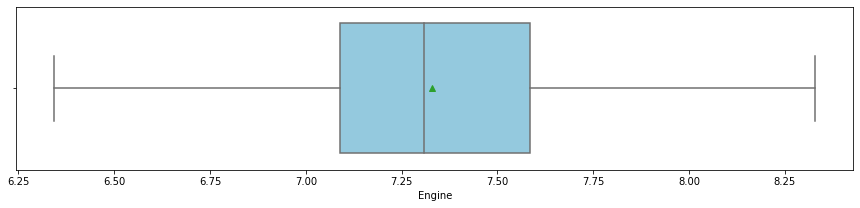

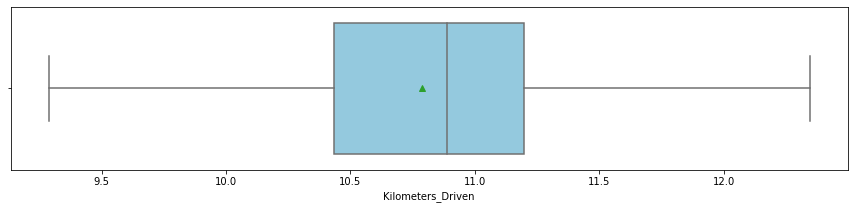

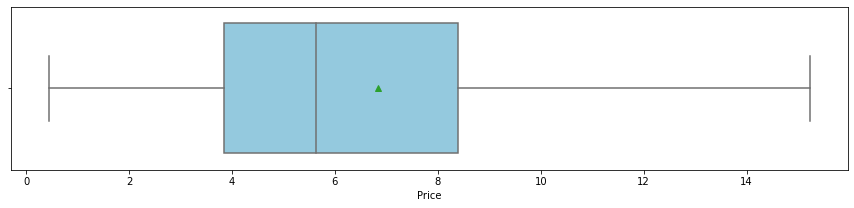

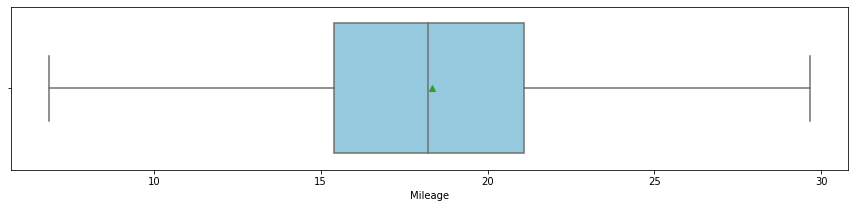

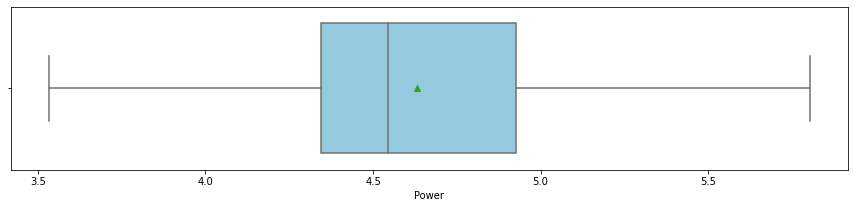

In [87]:
for i, col in enumerate(numerical_columns):
    plt.figure(figsize = (15, 3))
    sns.boxplot(x = df[col], showmeans=True, color = 'skyblue')   # show the position of mean

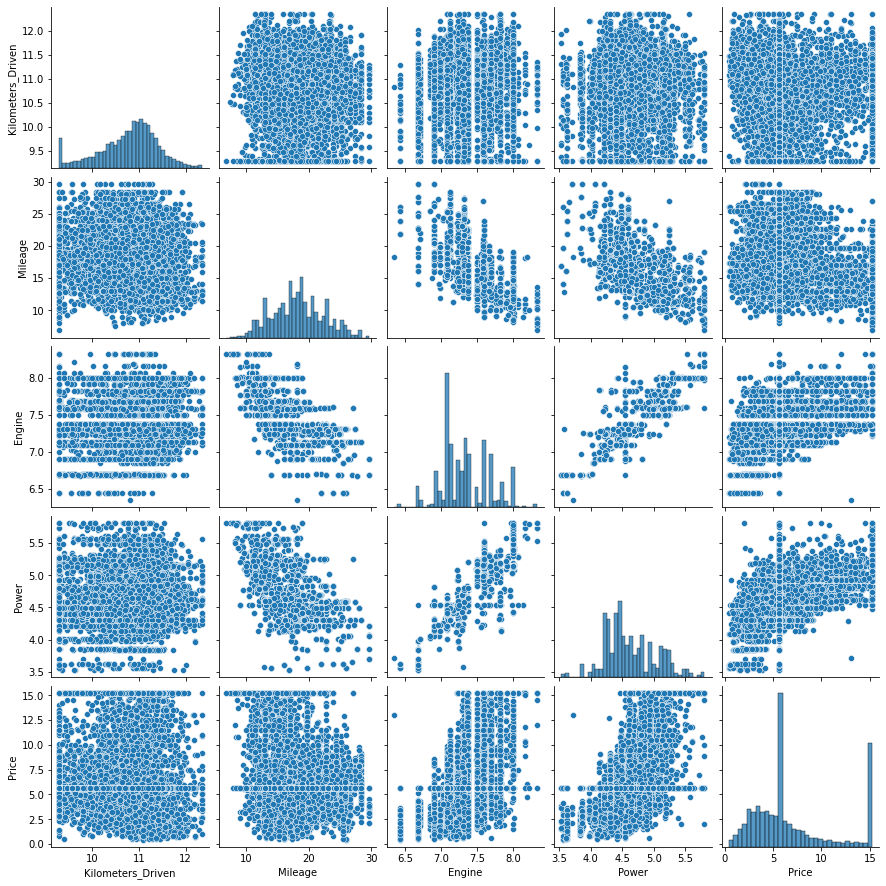

In [88]:
sns.pairplot(data = df); 

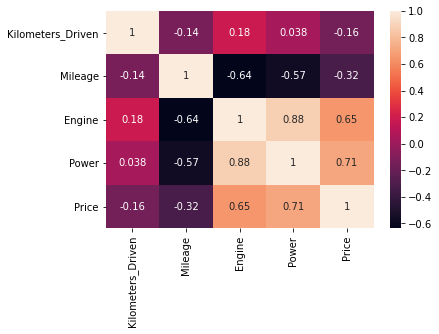

In [89]:
sns.heatmap(data = df.corr(), annot = True);

**Observation:** After transformation and outlier removal, numerical columns display distributions closer to normal distribution. Kilometers_Driven and Mileage still don't show much correlation with Price.

In [90]:
phase7 = df.copy()   # for debug use !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [91]:
df = phase7.copy() # outlier treatment completed. for debug use !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

#### Create dummy variables

Before building the model, all categorical variables need to be converted into numbers. For categorical variables such as Location, Fuel_Type, Transmission, Brand, whose values don't have ranking, it's better to apply one-hot encoding so that we don't impose nonexistent order on them.

In [92]:
# one-hot encoding for categorical variables which don't have order
df = pd.get_dummies(df, columns = ['Location', 'Fuel_Type', 'Transmission', 'Brand'], 
               prefix =  ['Location', 'Fuel_Type', 'Transmission', 'Brand'], drop_first = True)
df.head(2)

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Brand_Bentley,Brand_Bmw,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force One,Brand_Ford,Brand_Hindustan,Brand_Honda,Brand_Hyundai,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land Rover,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Opel,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,2010,11.1844,First,26.6000,6.9058,4.0632,5.0000,1.7500,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015,10.6213,First,19.6700,7.3664,4.8379,5.0000,12.5000,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [93]:
phase8 = df.copy()   # for debug use !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [94]:
df = phase8.copy() # one hot encoding completed. for debug use !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

#### Create ordinal encoder

Owner_Type, Seats and Year have ranking. Apply ordinal encoding.

In [95]:
# ordinal encoding for Owner_Type
df_temp = pd.DataFrame(OrdinalEncoder(categories = [['First', 'Second', 'Third', 'Fourth & Above']]).fit_transform(df[['Owner_Type']]),
                                             columns = ['Owner_Type_encoding'])  #  convert Owner_Type into ordinal encoding

df = pd.concat([df, df_temp.copy()], axis = 1)     # concatenate df and df_temp
df.drop('Owner_Type', axis = 1, inplace = True)    # drop the original Owner_Type column
df.head(2)                    

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Brand_Bentley,Brand_Bmw,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force One,Brand_Ford,Brand_Hindustan,Brand_Honda,Brand_Hyundai,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land Rover,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Opel,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Owner_Type_encoding
0,2010,11.1844,26.6000,6.9058,4.0632,5.0000,1.7500,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000
1,2015,10.6213,19.6700,7.3664,4.8379,5.0000,12.5000,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000


In [96]:
# ordinal encoding for Year and Seats
df_temp = pd.DataFrame(OrdinalEncoder().fit_transform(df[['Seats', 'Year']]), 
                       columns = ['Seats_encoding', 'Year_encoding'])   # convert Year and Seats into ordinal encoding

df = pd.concat([df, df_temp.copy()], axis = 1)    # concatenate df and df_temp
df.drop(['Seats', 'Year'], axis = 1, inplace = True)  # drop the original Year and Seats columns
df.head(2)  

,Kilometers_Driven,Mileage,Engine,Power,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Brand_Bentley,Brand_Bmw,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force One,Brand_Ford,Brand_Hindustan,Brand_Honda,Brand_Hyundai,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land Rover,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Opel,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Owner_Type_encoding,Seats_encoding,Year_encoding
0,11.1844,26.6000,6.9058,4.0632,1.7500,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,2.0000,13.0000
1,10.6213,19.6700,7.3664,4.8379,12.5000,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,2.0000,18.0000


In [97]:
df.shape

(7253, 53)

**Observation:** After ordinal encoding, the data frame has 7253 rows and 53 columns.

In [98]:
phase9 = df.copy()   # for debug use !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [99]:
df = phase9.copy() # ordinal encoding completed. for debug use !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

### Model building and evaluation

#### Linear regression

In [100]:
X = df.drop(['Price'], axis = 1)    # independent variables
y = df['Price']                          # dependent variables
X.head(2)

,Kilometers_Driven,Mileage,Engine,Power,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Brand_Bentley,Brand_Bmw,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force One,Brand_Ford,Brand_Hindustan,Brand_Honda,Brand_Hyundai,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land Rover,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Opel,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Owner_Type_encoding,Seats_encoding,Year_encoding
0,11.1844,26.6000,6.9058,4.0632,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,2.0000,13.0000
1,10.6213,19.6700,7.3664,4.8379,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,2.0000,18.0000


In [101]:
y.head(2)

0    1.7500
1   12.5000
Name: Price, dtype: float64

In [102]:
def display_parameters(model, index):
    """
    input:
    model: model.
    index: the index of the parameter DataFrame. List of strings.
    
    output:
    parameters: DataFrame.
    """
    parameters = pd.DataFrame(model.coef_.T, columns = ['coefficients'], index = index)
    parameters.loc['intercept', 'coefficients'] = model.intercept_
    return parameters

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, train_size = 0.7, random_state = 1)   # split training set and testing set
model_1 = LinearRegression().fit(X_train, y_train)           # create a linear regression model and fit it with training set

display_parameters(model_1, X.columns)  # output coefficients and intercept  

,coefficients
Kilometers_Driven,-0.4367
Mileage,-0.0884
Engine,1.0646
Power,2.8626
Location_Bangalore,0.2508
Location_Chennai,-0.0139
Location_Coimbatore,0.3541
Location_Delhi,-0.4109
Location_Hyderabad,0.3157
Location_Jaipur,0.0062


In [104]:
def compute_metrics(model, X, y_true):
    """
    input:
    model: model.
    X: independent variables. Dataframe with n observations and k features.
    y_true: ground truth of depedent variable. 1-D array.
    
    output:
    y_pred, R^2, adjusted R^2, MAE, RMSE, MAPE. float.
    """
    n, k = X.shape
    
    y_pred = model.predict(X)            # prediction
    R2 = model.score(X, y_true)        # R^2
    adjust_R2 = 1 - (1 - R2) * (n - 1) / (n - k - 1)  # adjusted R^2
    MAE = mean_absolute_error(y_true, y_pred)     # mean absolute error
    RMSE = mean_squared_error(y_true, y_pred, squared = False)      # root mean square error
    MAPE = mean_absolute_percentage_error(y_true, y_pred)  # mean_absolute_percentage_error
    
    return y_pred, R2, adjust_R2, MAE, RMSE, MAPE



def display_metrics(model, X_train, y_train, X_test, y_test):
    """
    input:
    model: model.
    X_train: independent variables of training set. DataFrame with n observations and k features.
    y_train: dependent variable of training set. 1-D array.
    X_test:  independent variables of testing set. DataFrame with m observations and k features.
    y_test:  dependent variable of testing set. 1-D array.
    
    output:
    evaluations: performance metrics. DataFrame.
    """
    metrics_train = compute_metrics(model, X_train, y_train) 
    metrics_test = compute_metrics(model, X_test, y_test) 

    column_names = ['R^2', 'Adjusted R^2', 'MAE', 'RMSE', 'MAPE']
    metrics = pd.DataFrame([metrics_train[1:], metrics_test[1:]], columns = column_names, index =  ['training set', 'testing set'])
    return metrics 

In [105]:
display_metrics(model_1, X_train, y_train, X_test, y_test)

,R^2,Adjusted R^2,MAE,RMSE,MAPE
training set,0.7185,0.7156,1.5593,2.2202,0.2905
testing set,0.7492,0.7431,1.5061,2.1445,0.2887


**Observation:** 
- The above metrics for training set and testing set are comparable. The reason why the performance on testing set is slightly better may be the data in testing set is easier to work with.
- R^2 and adjusted R^2 for training set is about 0.72, for testing set is 0.74, that explains more than 70% of total variation in the dataset. 
- MAE for training set and testing set are 1.56 and 1.51.
- RMSE for training set and testing set are 2.22 and 2.14.
- MAPE is 0.29 for both training set and testing set.
- Independent variables have different weights. For example, variables like Fuel_Type_Electric and Location_Jaipur are very trivial, while others like Brand_Maruti and Power play a very significant role in the model.

#### Forward feature selection

Try forward feature selection to see whether some insignificant independent variables could be removed to improve the model.

In [106]:
# linear regression model, forward selection, 5-fold cross validation, adjusted R^2 as criteria
sfs = SequentialFeatureSelector(LinearRegression(), k_features = X_train.shape[1],
                                forward = True, floating = False, verbose = 2, scoring = 'r2', cv = 5)
sfs = sfs.fit(X_train, y_train)        # fit the selector with training set

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.3s finished

[2021-05-07 21:55:11] Features: 1/52 -- score: 0.4969639891804894[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:    0.3s finished

[2021-05-07 21:55:11] Features: 2/52 -- score: 0.6134604496390416[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.3s finished

[2021-05-07 21:55:12] Features: 3/52 -- score: 0.6295939709613969[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    1.1s finished

[2021-05-07 21:55:33] Features: 28/52 -- score: 0.7087526793955983[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    1.2s finished

[2021-05-07 21:55:34] Features: 29/52 -- score: 0.7098051945470307[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.3s finished

[2021-05-07 21:55:36] Features: 30/52 -- score: 0.7108962069290474[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    1.0s finished

[2021-05-07 21:55:36] Features: 31/

**Observation:** When the number of features is 40, adjusted R^2 achieves the highest value.

In [107]:
# only apply 40 features in model
sfs = SequentialFeatureSelector(LinearRegression(), k_features = 40, forward = True, floating = False, verbose = 2, scoring = 'r2', cv = 5)
sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.4s finished

[2021-05-07 21:55:51] Features: 1/40 -- score: 0.4969639891804894[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:    0.3s finished

[2021-05-07 21:55:51] Features: 2/40 -- score: 0.6134604496390416[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.3s finished

[2021-05-07 21:55:51] Features: 3/40 -- score: 0.6295939709613969[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    1.4s finished

[2021-05-07 21:56:12] Features: 28/40 -- score: 0.7087526793955983[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    1.2s finished

[2021-05-07 21:56:14] Features: 29/40 -- score: 0.7098051945470307[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.9s finished

[2021-05-07 21:56:15] Features: 30/40 -- score: 0.7108962069290474[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    1.6s finished

[2021-05-07 21:56:17] Features: 31/

In [108]:
feature_index = list(sfs.k_feature_idx_)        # the indices of selected features
pd.DataFrame(X.columns[feature_index], columns = ['Selected features'])  # output selected features

,Selected features
0,Kilometers_Driven
1,Mileage
2,Engine
3,Power
4,Location_Bangalore
5,Location_Chennai
6,Location_Coimbatore
7,Location_Hyderabad
8,Location_Jaipur
9,Location_Kolkata


In [109]:
X_new = X[X.columns[feature_index]]

X_new_train, X_new_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, train_size = 0.7, random_state = 1)
model_2 = LinearRegression().fit(X_new_train, y_train)        # another model only using selected features

display_parameters(model_2, X_new.columns)

,coefficients
Kilometers_Driven,-0.4244
Mileage,-0.0867
Engine,1.0667
Power,2.8400
Location_Bangalore,0.5167
Location_Chennai,0.2418
Location_Coimbatore,0.6128
Location_Hyderabad,0.5702
Location_Jaipur,0.2567
Location_Kolkata,-0.7405


In [110]:
display_metrics(model_2, X_new_train, y_train, X_new_test, y_test)

,R^2,Adjusted R^2,MAE,RMSE,MAPE
training set,0.7179,0.7157,1.5630,2.2225,0.2915
testing set,0.7471,0.7423,1.5133,2.1538,0.2899


**Observation:** Get similar metrics with 40 features selected by forward feature selection. Forward feature selection doesn't seem to help much.

### Conclusion and recommendation

- Price is positively correlated to power and displacement volume. Luxury brands tend to have higher power and displacement volume.
- Price varies dramatically across brands. Luxury brands are more expensive.
- The number of seats affects the price in such a way that, cars with 2 seats are often more expensive since they're often luxury brands. Cars with more than 8 seats tend to get lower price because they're usually economy brands.
- The numbe of previous owner(s) imposes negative impact on price. The more previous owner(s) it has, the higher the total kilometers driven by previous owner(s) and the lower the price is.
- Price is related to the type of transmission. Automatic transmission car tend to be more expensive, regardless of brand.
- Price varies across cars using different type of fuel. Diesel cars and electric cars tend to be more expensive, while cars powered by gases are more affordable.
- Location of the car doesn't influence price much, with the exception of Bangalore and Coimbatore where cars are sold at a higher price.
- Newer cars tend to get higher price.